# <center> IoT Device on Bicycle Safety: a case study with an unsupervised clustering model to estimate hazardous areas </center>

<center> MSc Analysis </center>
<center> Universidade de Brasília (PPGT/UnB) </center>

<center>MSc Candidate: <a href="https://www.linkedin.com/in/marcelmello/" target="_blank"> LinkedIn </a></center>
<center> Curriculum: <a href="" target="_blank"> Lattes </a></center>

This research aimed to estimate hazardous areas for bicycle mobility by comparing unsupervised machine-learning algorithms based on an Internet of Things sensor device for data collection. The Lateral Passing Distance (LPD) data collected among bicycles and vehicles were related to a variate cyclist data. Some of this data includes bicycle velocity, curse elevation, global positioning system (GPS) coordinates, acceleration, and gyroscopic information through a naturalistic collection on the street.

In [ ]:
from IPython.display import HTML

HTML('''<script>
code_show=true;
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

#Python Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
!pip install geopandas --quiet
!pip install contextily --quiet

import matplotlib.pyplot as plt
import matplotlib.colors as colors
import plotly.express as px

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score as ss
from scipy import stats
import scipy.stats as stats


import geopandas as gpd
import contextily #mapas estaticos
import folium #mapas dinâmicos(html)
from shapely.geometry import Point

print('Python dependencies installed')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 55.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.7/56.7 kB 7.1 MB/s eta 0:00:00
Python dependencies installed


In [ ]:
df = pd.read_excel("/content/drive/MyDrive/MSc/park_analysis4_total.xlsx")

# df = pd.read_csv('')

  #csv dando problema de encode

# Exploratory Data Analysis and Testing

In [ ]:
import numpy as np


# Measures of Central Tendency (Mean, Median, Mode)
mean = np.mean(df)
median = np.median(df)
mode = stats.mode(df).mode[0]

#Measures of Dispersion (Variance, Standard Deviation, Range):
variance = np.var(df, ddof=1)  # Set ddof=1 for unbiased estimation
std_deviation = np.std(df, ddof=1)
range_val = max(df) - min(df)

print("Variance:", variance)
print("Standard Deviation:", std_deviation)
print("Range:", range_val)


*Percentiles and Quartiles*

In [ ]:
percentile_25 = np.percentile(data, 25)
percentile_50 = np.percentile(data, 50)
percentile_75 = np.percentile(data, 75)

print("25th Percentile:", percentile_25)
print("50th Percentile (Median):", percentile_50)
print("75th Percentile:", percentile_75)


*outlier detection*

In [ ]:
mean = np.mean(data)
std_deviation = np.std(data)

outliers = [x for x in data if x < mean - 2 * std_deviation or x > mean + 2 * std_deviation]

#common usying 1.5*std

print("Outliers:", outliers)


*ploting*

In [ ]:
import matplotlib.pyplot as plt

plt.hist(data, bins=10)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Data')
plt.show()


## Sampling

In [ ]:
import random

# Assuming you have a list of data called 'population_data'
sample_size = 100
sample = random.sample(population_data, sample_size)


In [ ]:
# Assuming you have a DataFrame 'data' with a column 'cluster' for clustering
clusters = data['cluster'].unique()
clusters_to_select = 10

selected_clusters = random.sample(clusters, clusters_to_select)
cluster_sample = data[data['cluster'].isin(selected_clusters)]


*Confidence interval for the Mean*

In [ ]:
import numpy as np
from scipy import stats

# Assuming you have a sample data array called 'sample_data'
confidence_level = 0.95  # 95% confidence level
sample_mean = np.mean(sample_data)
sample_std = np.std(sample_data, ddof=1)  # ddof=1 for unbiased estimation of sample variance
sample_size = len(sample_data)
z_critical = stats.norm.ppf(1 - (1 - confidence_level) / 2)

margin_of_error = z_critical * (sample_std / np.sqrt(sample_size))
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

print(f"Confidence Interval for the Mean: {confidence_interval}")


## A/B test

In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt


# Assuming you have 'revenue' data for both groups
revenue_current_strategy = [/* revenue for current surge pricing */]
revenue_new_algorithm = [/* revenue for new dynamic pricing */]

# or

# Assuming you have a DataFrame 'uber_data' with columns: 'user_id', 'rides', and 'has_ride_pass'
control_group = uber_data[uber_data['has_ride_pass'] == False]['rides']
variant_group = uber_data[uber_data['has_ride_pass'] == True]['rides']


t_stat, p_value = stats.ttest_ind(revenue_current_strategy, revenue_new_algorithm)
t_stat, p_value = stats.ttest_ind(control_group, variant_group)



In [ ]:
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. There is a statistically significant difference.")
else:
    print("Fail to reject the null hypothesis. There is no statistically significant difference.")


*compare metrics*

In [ ]:
average_rides_control = control_group.mean()
average_rides_variant = variant_group.mean()

print(f"Average rides in control group: {average_rides_control}")
print(f"Average rides in variant group: {average_rides_variant}")


*visualize the data*

In [ ]:
plt.boxplot([control_group, variant_group], labels=['Control', 'Variant'])
plt.ylabel('Number of Rides')
plt.title('A/B Test Results for "Ride Pass"')
plt.show()


In [ ]:
# checar por valores duplicados resultando num boleano
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
156    False
157    False
158    False
159    False
160    False
Length: 161, dtype: bool

In [ ]:
df.head(3)

latitude  longitude     accex     accey      accez  climb      gyrox  \
0 -15.804338 -47.910262  2.810793  0.689530   2.487576  0.195  49.954198   
1 -15.797828 -47.911870 -0.062249  6.449979  19.612701  0.190  55.763359   
2 -15.808282 -47.926879  0.423774  8.176199  -5.906495  0.147  -8.717557   

      gyroy      gyroz   us_lpd_left  speed  
0  0.290076 -14.366412        189.04  9.062  
1  7.351145 -10.389313        160.03  6.722  
2 -1.816794 -10.396947         65.30  3.850

In [ ]:
exp = df.copy()
exp.rename(columns = {' us_lpd_left':'lpd'}, inplace = True)

Lateral Passing Distance Statistics

In [ ]:
exp['lpd'].describe()

count    161.000000
mean     259.523665
std      155.390313
min        2.580000
25%      136.360000
50%      235.970000
75%      350.220000
max      693.170000
Name: lpd, dtype: float64

###data cleaning - study df


*   replacing values
*   dropna




In [ ]:
study = df.copy()

In [ ]:
import numpy as np

  #Substitui um caractere por NaN (replace)
study = study.replace('?', np.nan)


  #remove os valores Nan
study = study.dropna()

In [ ]:
study.head(3)

latitude  longitude     accex     accey      accez  climb      gyrox  \
0 -15.804338 -47.910262  2.810793  0.689530   2.487576  0.195  49.954198   
1 -15.797828 -47.911870 -0.062249  6.449979  19.612701  0.190  55.763359   
2 -15.808282 -47.926879  0.423774  8.176199  -5.906495  0.147  -8.717557   

      gyroy      gyroz   us_lpd_left  speed  
0  0.290076 -14.366412        189.04  9.062  
1  7.351145 -10.389313        160.03  6.722  
2 -1.816794 -10.396947         65.30  3.850

In [ ]:
  # removendo colunas dos dados - segunda e terceira
study = study.drop(study.columns[[1, 2]], axis=1)


  # para remoção de linhas
study = study.drop(study.index[[0, 1]], axis=0)
study.head()

latitude      accey     accez  climb      gyrox      gyroy      gyroz  \
2 -15.808282   8.176199 -5.906495  0.147  -8.717557  -1.816794 -10.396947   
3 -15.791270   8.135497 -5.066131  0.138  19.106870  13.541985   0.824427   
4 -15.799999   8.690952 -2.391807  0.138  -0.664122  -5.297710   7.038168   
5 -15.811304  10.467450 -0.043096  0.138  -9.030534  -1.832061  -2.061069   
6 -15.795675  12.672509 -3.507505  0.135  23.984733   9.366412  15.213740   

    us_lpd_left  speed  
2         65.30  3.850  
3        140.94  4.424  
4        223.68  6.653  
5         86.18  5.318  
6        415.89  6.838

In [ ]:
speed_mean = study['speed'].mean()
round(speed_mean*3,6)

TypeError: ignored

In [ ]:
speed_count = study['speed'].value_counts()
speed_count

6.84    2
9.60    2
0.00    2
9.17    2
7.83    2
       ..
4.49    1
5.86    1
8.24    1
7.92    1
8.04    1
Name: speed, Length: 154, dtype: int64

Identificação de outliers

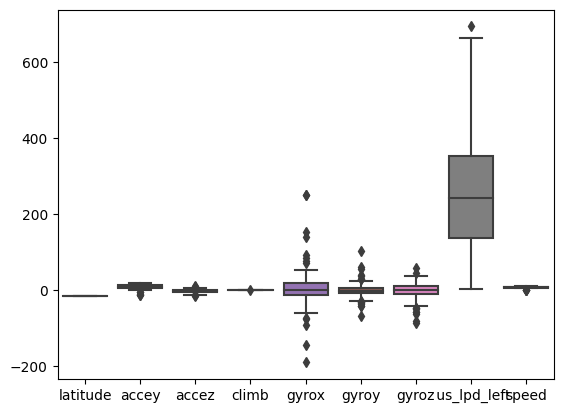

In [ ]:
  # construção de bosplot, também posso delimitar qual coluna de análise

sns.boxplot(data=study)
plt.show(True)

Para analisar o comportamento de outliers - pairplot (melhor com poucas colunas)

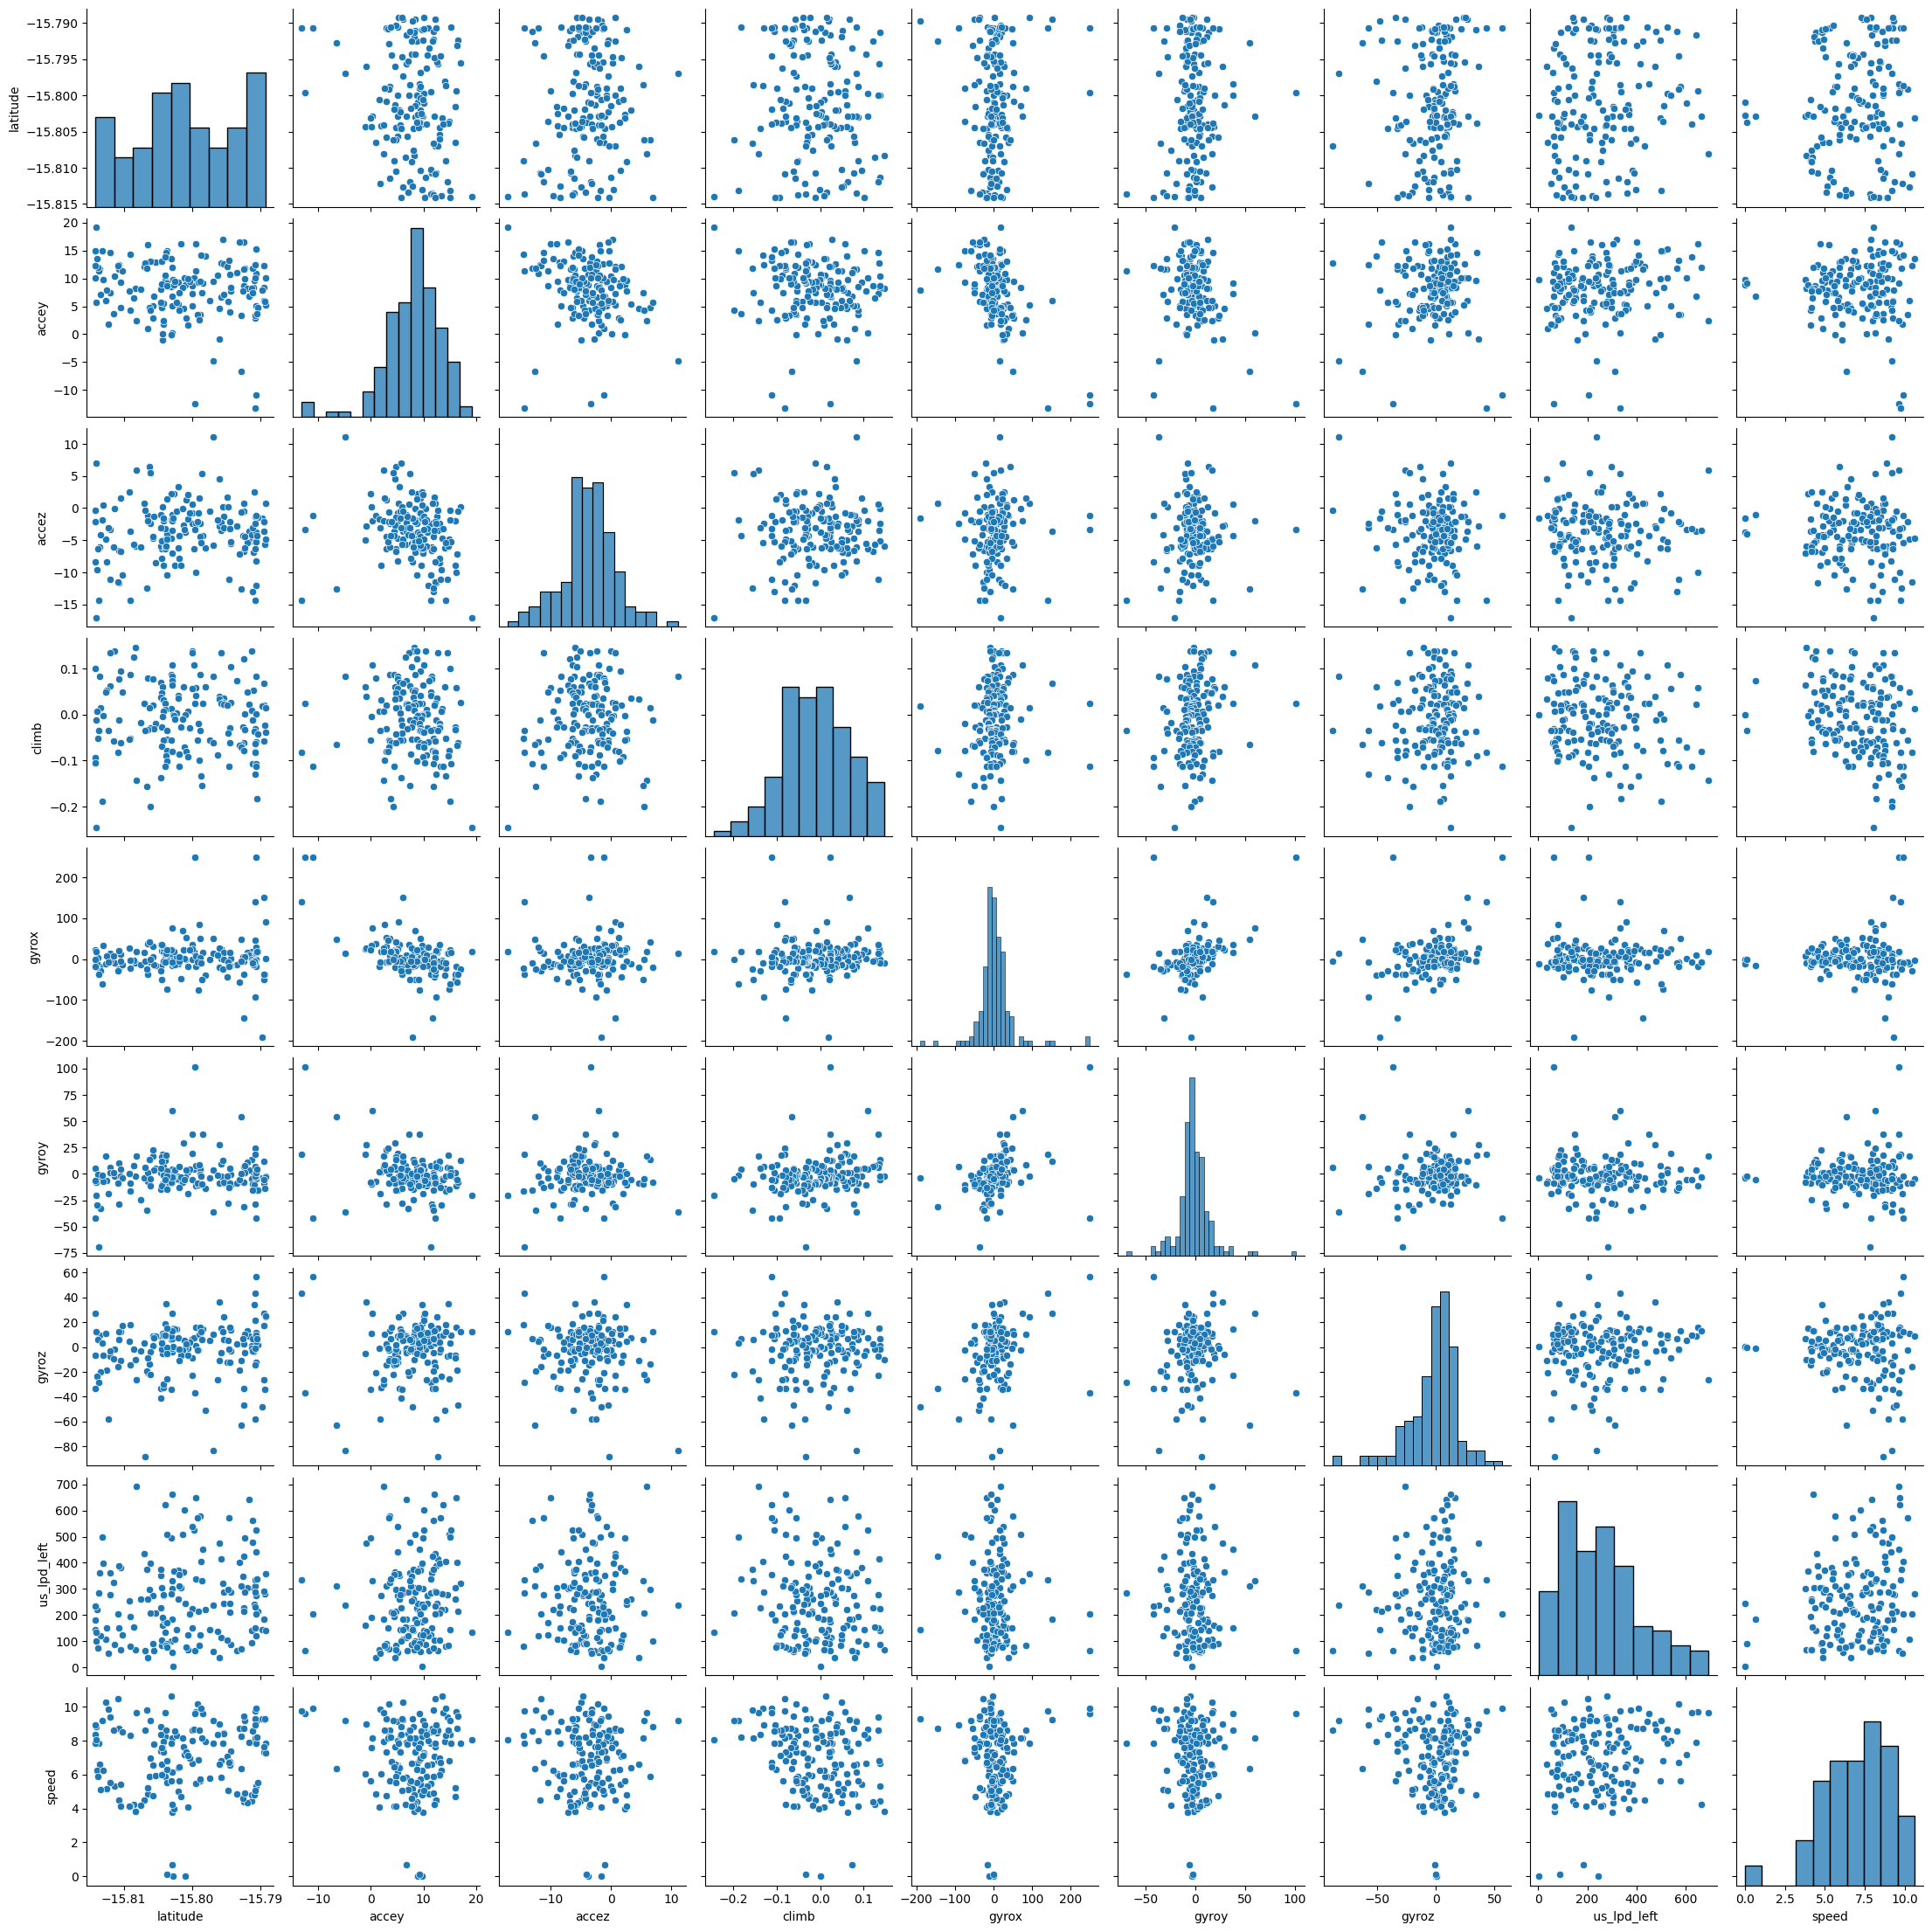

In [ ]:
sns.pairplot(study)
plt.show()

Lateral Passing Distance Histogram with Kernel Density Estimation (KDE)

<ipython-input-18-7d349b1fa37e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  expkde = sns.distplot(exp['lpd'], bins=15)


Text(0.5, 0, 'Lateral Passing Distance (cm)')

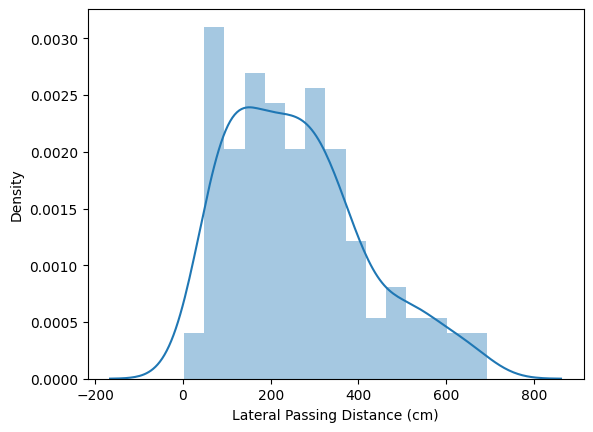

In [ ]:
expkde = sns.distplot(exp['lpd'], bins=15)
expkde.set_xlabel("Lateral Passing Distance (cm)")

<ipython-input-19-7b70715efd2c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  expkde2 = sns.distplot(exp['speed'], bins=15)


Text(0.5, 0, 'Speed (m/s)')

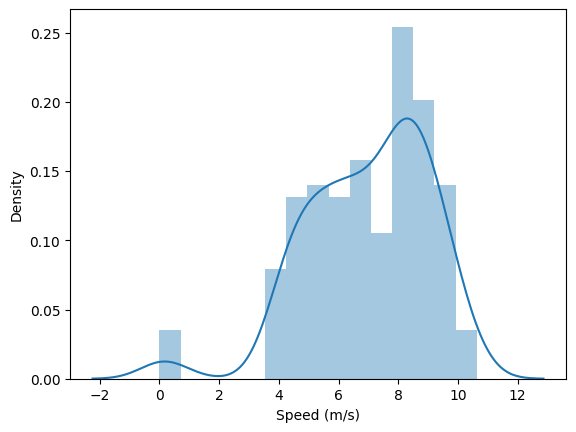

In [ ]:
expkde2 = sns.distplot(exp['speed'], bins=15)
expkde2.set_xlabel("Speed (m/s)")

Relationship between Climb and LPD

In [ ]:
exp_climb_lpd = px.scatter(exp, x='lpd',y='climb', color='lpd')
exp_climb_lpd

Percentage of values in ascending and downward movement regarding the threshold lateral clearance distance of 150cm.
(LPD < 150cm uphill)

In [ ]:
up = exp[(exp['climb'] > 0) & (exp['lpd'] < 150)].value_counts('lpd')
down = exp[(exp['climb'] < 0) & (exp['lpd'] < 150)].value_counts('lpd')

p = up.count()/down.count()
(p-1)*100

4.347826086956519

When relating LPD to Climb and Speed, the following correlation was obtained by fitting a regression model to observe the resulting line on a 95% confidence interval. The LPD is on the y-axis, and the climb and speed data are on the x-axis.

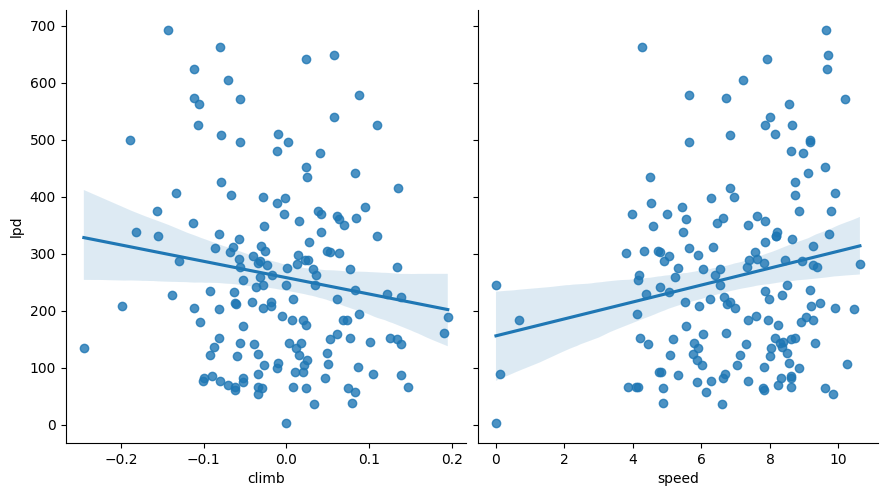

In [ ]:
sns.pairplot(exp, x_vars=["climb", "speed"], y_vars=["lpd"], height=5, aspect=.9, kind="reg");

Acceleration and Rotation correlation to LPD, fitting a regression model to observe the resulting line on a 95% confidence interval.

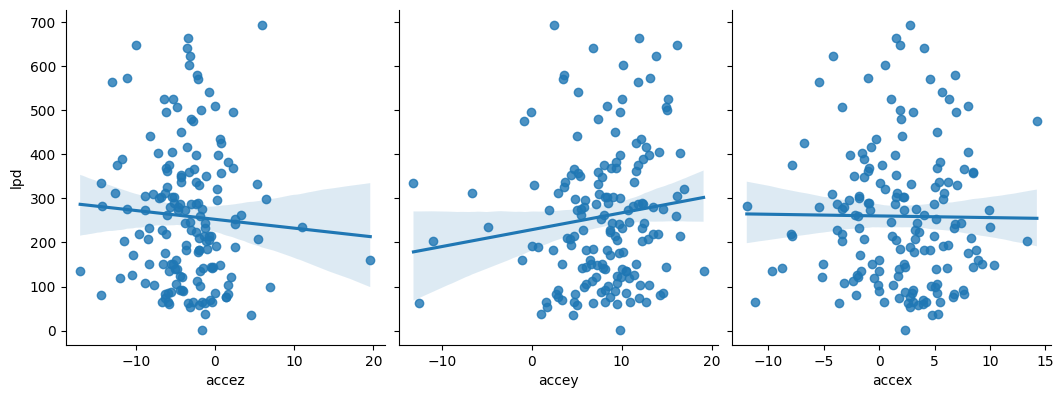

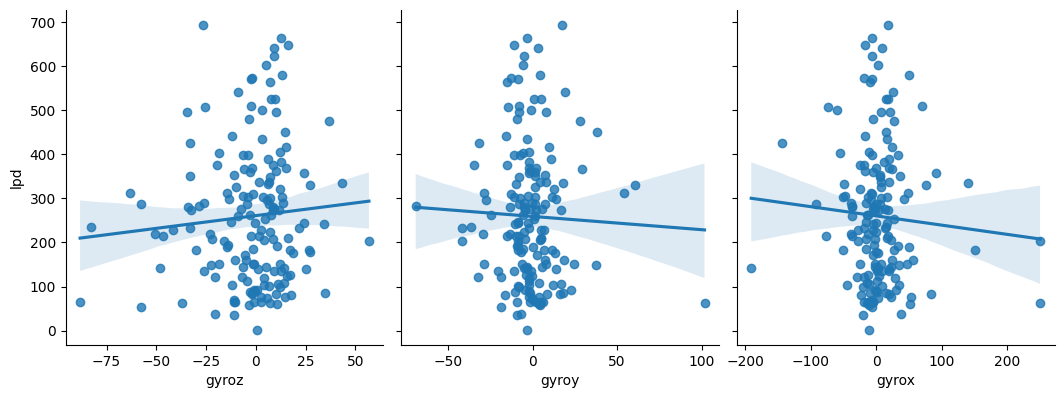

In [ ]:
sns.pairplot(exp, x_vars=["accez",'accey',"accex"], y_vars=["lpd"], height=4, aspect=.9, kind="reg");
sns.pairplot(exp, x_vars=["gyroz",'gyroy',"gyrox"], y_vars=["lpd"], height=4, aspect=.9, kind="reg");

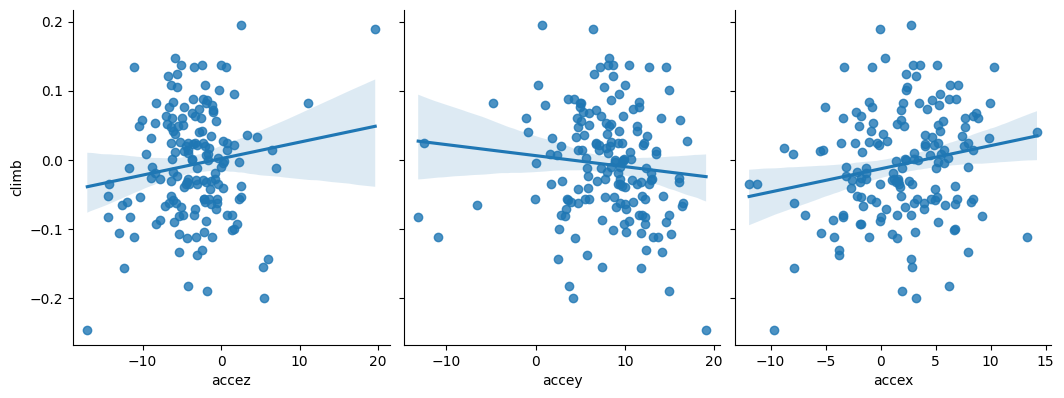

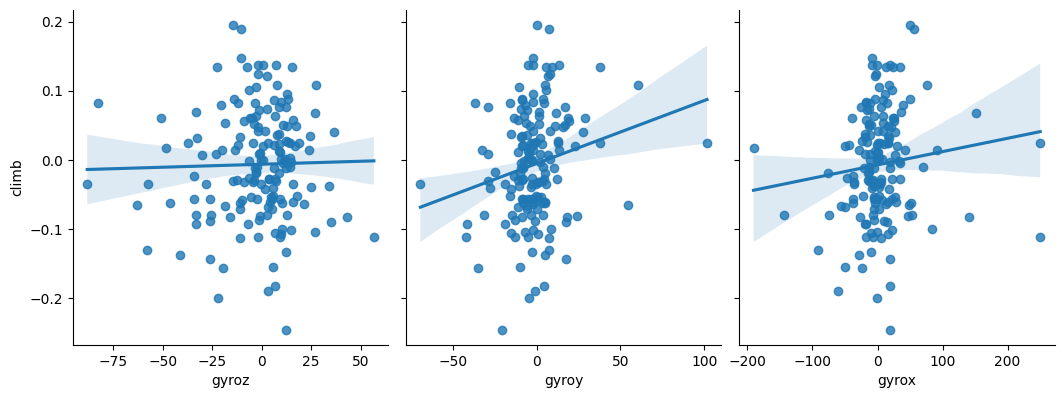

In [ ]:
sns.pairplot(exp, x_vars=["accez",'accey',"accex"], y_vars=["climb"], height=4, aspect=.9, kind="reg");
sns.pairplot(exp, x_vars=["gyroz",'gyroy',"gyrox"], y_vars=["climb"], height=4, aspect=.9, kind="reg");


#Accident history - Geo Pandas

In [ ]:
import pandas as pd
geo = pd.read_excel('/content/drive/MyDrive/MSc/sinistrosbike_pdc.xlsx')

In [ ]:
geo.head(3)

fid Fatalidade        Data    Dia  Jurisdicao        RA  \
0  3632        NÃO  2019-07-17  4-QUA  VIA URBANA  BRASÍLIA   
1  3990        NÃO  2019-07-16  3-TER  VIA URBANA  BRASÍLIA   
2  5129        NÃO  2017-10-03  3-TER  VIA URBANA  BRASÍLIA   

                   Via-Av.                                           Endereco  \
0  VIA DO PARQUE DA CIDADE  VIA DO PARQUE DA CIDADE, PRÓX. AO ESTACIONAMEN...   
1  VIA DO PARQUE DA CIDADE  VIA DO PARQUE DA CIDADE, SRPS, PRÓX. AO PAVILH...   
2  VIA DO PARQUE DA CIDADE  VIA DO PARQUE DA CIDADE, PRÓX. AO ESTACIONAMEN...   

  Natureza Vit. Falta  Vit. Ferido                  Veiculo   Ano   latitude  \
0  COLISÃO          -            1  CAMINHONETA x BICICLETA  2019 -15.792456   
1  COLISÃO          -            1    BICICLETA x AUTOMÓVEL  2019 -15.795415   
2  COLISÃO          -            1  CAMINHONETA x BICICLETA  2017 -15.803819   

   longitude  
0 -47.896588  
1 -47.910087  
2 -47.905642

In [ ]:
import geopandas as gpd
geometry = [Point(xy) for xy in zip(geo['longitude'], geo['latitude'])]
geo_pdc = gpd.GeoDataFrame(geo, crs='EPSG:4326', geometry=geometry)

  #crio uma coluna com pontos de longitude e latidude agrupados.
  #tranformo o df em GeoDataFrame
  #ajusto o sistema de coordenadas geo - EPSG:4326

#geo_pdc = geo_pdc.to_crs(crs='EPSG:3857')
#geo_pdc.crs.to_string()

  #altero o sis de coordenadas geo para EPSG:3857 (trabalha em metros)
  #confere crs

In [ ]:
geo_pdc.head()

fid Fatalidade        Data    Dia  Jurisdicao        RA  \
0  3632        NÃO  2019-07-17  4-QUA  VIA URBANA  BRASÍLIA   
1  3990        NÃO  2019-07-16  3-TER  VIA URBANA  BRASÍLIA   
2  5129        NÃO  2017-10-03  3-TER  VIA URBANA  BRASÍLIA   
3  5189        NÃO  2018-08-07  3-TER  VIA URBANA  BRASÍLIA   
4  5451        NÃO  2018-12-16  1-DOM  VIA URBANA  BRASÍLIA   

                   Via-Av.                                           Endereco  \
0  VIA DO PARQUE DA CIDADE  VIA DO PARQUE DA CIDADE, PRÓX. AO ESTACIONAMEN...   
1  VIA DO PARQUE DA CIDADE  VIA DO PARQUE DA CIDADE, SRPS, PRÓX. AO PAVILH...   
2  VIA DO PARQUE DA CIDADE  VIA DO PARQUE DA CIDADE, PRÓX. AO ESTACIONAMEN...   
3  VIA DO PARQUE DA CIDADE            VIA DO PARQUE DA CIDADE, PRÓX. AO GIBÃO   
4  VIA DO PARQUE DA CIDADE          VIA DO PARQUE DA CIDADE, PRÓX. AO ALPINOS   

  Natureza Vit. Falta  Vit. Ferido                  Veiculo   Ano   latitude  \
0  COLISÃO          -            1  CAMINHONETA x BICICLETA  2019 -15.792456   
1  COLISÃO          -            1    BICICLETA x AUTOMÓVEL  2019 -15.795415   
2  COLISÃO          -            1  CAMINHONETA x BICICLETA  2017 -15.803819   
3  COLISÃO          -            1  BICICLETA x CAMINHONETA  2018 -15.804182   
4  COLISÃO          -            1  CAMINHONETA x BICICLETA  2018 -15.806083   

   longitude                     geometry  
0 -47.896588  POINT (-47.89659 -15.79246)  
1 -47.910087  POINT (-47.91009 -15.79542)  
2 -47.905642  POINT (-47.90564 -15.80382)  
3 -47.920026  POINT (-47.92003 -15.80418)  
4 -47.924813  POINT (-47.92481 -15.80608)

In [ ]:
geo_pdc = geo_pdc.to_crs(crs='EPSG:3857')
  #altero o sis de coordenadas geo para EPSG:3857 (trabalha em metros)

In [ ]:
geo_pdc.crs.to_string()

'EPSG:3857'

Crashes visualization

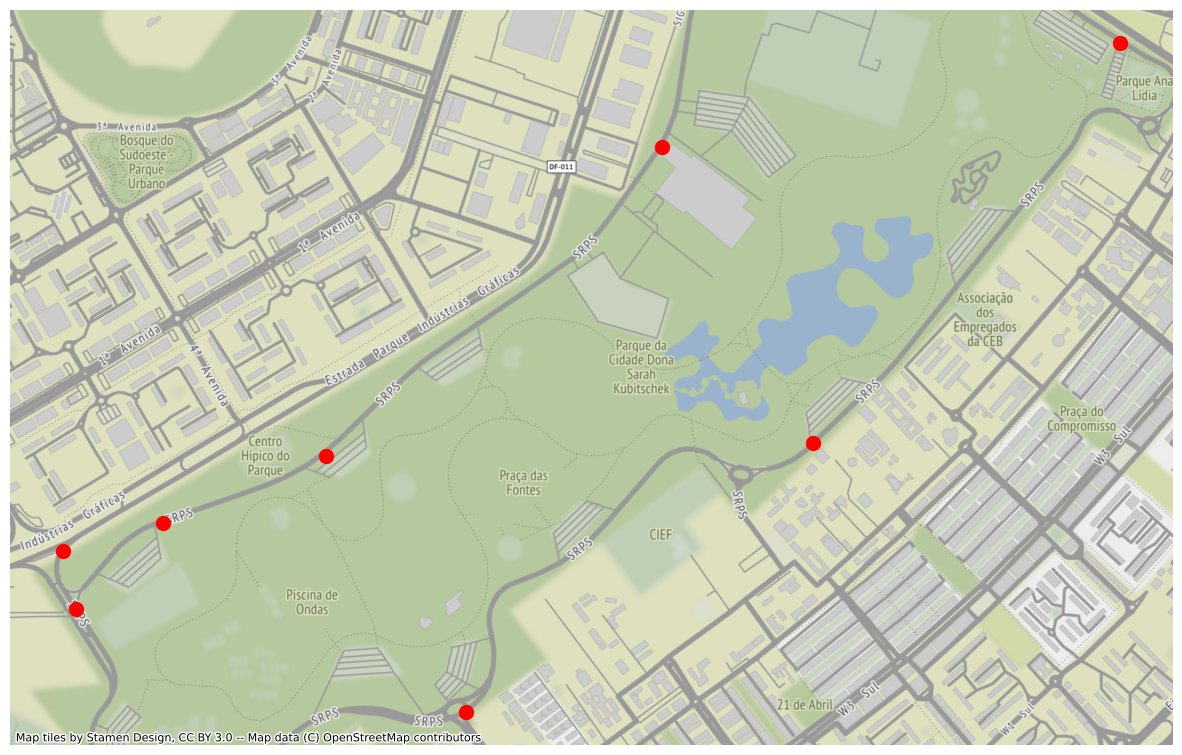

In [ ]:
import matplotlib.pyplot as plt
ax = geo_pdc.plot(figsize=(15, 22), markersize=100, color='red', legend=True)
contextily.add_basemap(ax) #biblioteca que dá um contexto pro mapa (um fundo)
ax.set_axis_off()
plt.show()

In [ ]:
pdc_folium = geo_pdc.copy()
accidents = pdc_folium[['latitude', 'longitude']]
locationlist = accidents.values.tolist()
len(locationlist)
locationlist[0]

[-15.792456, -47.896588]

In [ ]:
pdc_folium = pdc_folium.reset_index()

Crases visualization - Interative map

In [ ]:
park_center = [-15.804051955,	-47.90995495]
mapa = folium.Map(location=park_center, zoom_start=14)

for point in range(0, len(locationlist)):
    folium.Marker(locationlist[point],
                  popup=pdc_folium['Veiculo'][point],
                  icon=folium.Icon(color='red')).add_to(mapa)

#mapa.save('accidents_pdc.html')

mapa

#K-means - Andy




In [ ]:
df = pd.read_excel("/content/drive/MyDrive/MSc/park_analysis4_total.xlsx")

In [ ]:
# dfgy = pd.read_excel("/content/drive/MyDrive/MSc/park4_gy.xlsx")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   latitude      161 non-null    float64
 1   longitude     161 non-null    float64
 2   accex         161 non-null    float64
 3   accey         161 non-null    float64
 4   accez         161 non-null    float64
 5   climb         161 non-null    float64
 6   gyrox         161 non-null    float64
 7   gyroy         161 non-null    float64
 8   gyroz         161 non-null    float64
 9    us_lpd_left  161 non-null    float64
 10  speed         161 non-null    float64
dtypes: float64(11)
memory usage: 14.0 KB


In [ ]:
pck = df.copy()

In [ ]:
# pgy = dfgy.copy()

In [ ]:
pck.head(2)

latitude  longitude     accex     accey      accez  climb      gyrox  \
0 -15.804338 -47.910262  2.810793  0.689530   2.487576  0.195  49.954198   
1 -15.797828 -47.911870 -0.062249  6.449979  19.612701  0.190  55.763359   

      gyroy      gyroz   us_lpd_left  speed  
0  0.290076 -14.366412        189.04  9.062  
1  7.351145 -10.389313        160.03  6.722

In [ ]:
pck.rename(columns = {' us_lpd_left':'us_lpd'}, inplace = True)

In [ ]:
def optimise_k_means(data, max_k):
    means = []
    inertias = []

    for k in range(1,max_k):
        kmeans = KMeans(n_clusters=k, random_state=42, init='k-means++', n_init=10)
        kmeans.fit(data)
        means.append(k)
        inertias.append(kmeans.inertia_)

 #Generating the
    fig = plt.subplots(figsize=(10, 5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia")
    plt.title('Elbow Method For Optimal number of Clusters')
    plt.grid(True)
    plt.show()

In [ ]:
pck.head()

latitude  longitude     accex     accey      accez  climb      gyrox  \
0 -15.804338 -47.910262  2.810793  0.689530   2.487576  0.195  49.954198   
1 -15.797828 -47.911870 -0.062249  6.449979  19.612701  0.190  55.763359   
2 -15.808282 -47.926879  0.423774  8.176199  -5.906495  0.147  -8.717557   
3 -15.791270 -47.909070  5.164293  8.135497  -5.066131  0.138  19.106870   
4 -15.799999 -47.914681  3.617639  8.690952  -2.391807  0.138  -0.664122   

       gyroy      gyroz  us_lpd  speed  
0   0.290076 -14.366412  189.04  9.062  
1   7.351145 -10.389313  160.03  6.722  
2  -1.816794 -10.396947   65.30  3.850  
3  13.541985   0.824427  140.94  4.424  
4  -5.297710   7.038168  223.68  6.653

Padronização - standartization

In [ ]:
scaler = StandardScaler()
# scaler = StandaMinMaxScaler() quando der erro de que os valores são de grandezas diferente'
# pck[['climb_t', 'us_lpd_t', 'speed_t']] = scaler.fit_transform(pck[['climb', 'us_lpd', 'speed']])
pck[['climb_t', 'us_lpd_t', 'speed_t',
     'accex_t', 'accey_t', 'accez_t',
     'gyrox_t', 'gyroy_t', 'gyroz_t']] = scaler.fit_transform(pck[['climb', 'us_lpd', 'speed',
                                                                   'accex', 'accey', 'accez',
                                                                   'gyrox', 'gyroy', 'gyroz']])
pck.head()

latitude  longitude     accex     accey      accez  climb      gyrox  \
0 -15.804338 -47.910262  2.810793  0.689530   2.487576  0.195  49.954198   
1 -15.797828 -47.911870 -0.062249  6.449979  19.612701  0.190  55.763359   
2 -15.808282 -47.926879  0.423774  8.176199  -5.906495  0.147  -8.717557   
3 -15.791270 -47.909070  5.164293  8.135497  -5.066131  0.138  19.106870   
4 -15.799999 -47.914681  3.617639  8.690952  -2.391807  0.138  -0.664122   

       gyroy      gyroz  us_lpd  speed   climb_t  us_lpd_t   speed_t  \
0   0.290076 -14.366412  189.04  9.062  2.536422 -0.455006  1.008683   
1   7.351145 -10.389313  160.03  6.722  2.473431 -0.642280 -0.130286   
2  -1.816794 -10.396947   65.30  3.850  1.931700 -1.253808 -1.528199   
3  13.541985   0.824427  140.94  4.424  1.818315 -0.765515 -1.248811   
4  -5.297710   7.038168  223.68  6.653  1.818315 -0.231388 -0.163871   

    accex_t   accey_t   accez_t   gyrox_t   gyroy_t   gyroz_t  
0  0.193596 -1.409379  1.247691  0.988174  0.091380 -0.560152  
1 -0.426136 -0.294556  4.819251  1.112933  0.492394 -0.372804  
2 -0.321298  0.039520 -0.502948 -0.271872 -0.028274 -0.373164  
3  0.701260  0.031643 -0.327685  0.325691  0.843985  0.155438  
4  0.367637  0.139141  0.230063 -0.098915 -0.225963  0.448147

MinMaxScaler

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# considera somente os atributos, ignorando a última coluna, que contem a classe
X = np.array(study[study.columns[0:study.shape[1]-1]])
for i  in range(X.shape[1]):
    print("Maior valor da coluna:", i, ":", max(X[:,i]))
    print("Menor Valor da coluna:", i, ":", min(X[:,i]))
# prepara a função para transformar os dados
scaler = MinMaxScaler(feature_range=(0, 1))
# Realiza a normalização e coloca em um novo vetor
X_norm = scaler.fit_transform(X)
print(X_norm)

Maior valor da coluna: 0 : -15.789250742
Menor Valor da coluna: 0 : -15.814153074
Maior valor da coluna: 1 : 19.117700256
Menor Valor da coluna: 1 : -13.158532324
Maior valor da coluna: 2 : 11.03248125
Menor Valor da coluna: 2 : -17.029956409
Maior valor da coluna: 3 : 0.147
Menor Valor da coluna: 3 : -0.245
Maior valor da coluna: 4 : 250.129770992
Menor Valor da coluna: 4 : -190.641221374
Maior valor da coluna: 5 : 101.717557252
Menor Valor da coluna: 5 : -69.290076336
Maior valor da coluna: 6 : 56.770992366
Menor Valor da coluna: 6 : -88.267175573
Maior valor da coluna: 7 : 693.17
Menor Valor da coluna: 7 : 2.58
[[0.23576017 0.66100438 0.39638256 ... 0.39456299 0.53689474 0.09082089]
 [0.91892414 0.65974334 0.42632881 ... 0.48437639 0.61426316 0.20035042]
 [0.5683695  0.67695275 0.52162785 ... 0.37420766 0.65710526 0.32016102]
 ...
 [0.04241294 0.87226467 0.54278645 ... 0.39974109 0.63089474 0.72051434]
 [0.32110776 0.53935168 0.80112618 ... 0.37920721 0.45494737 0.29807845]
 [0.0059

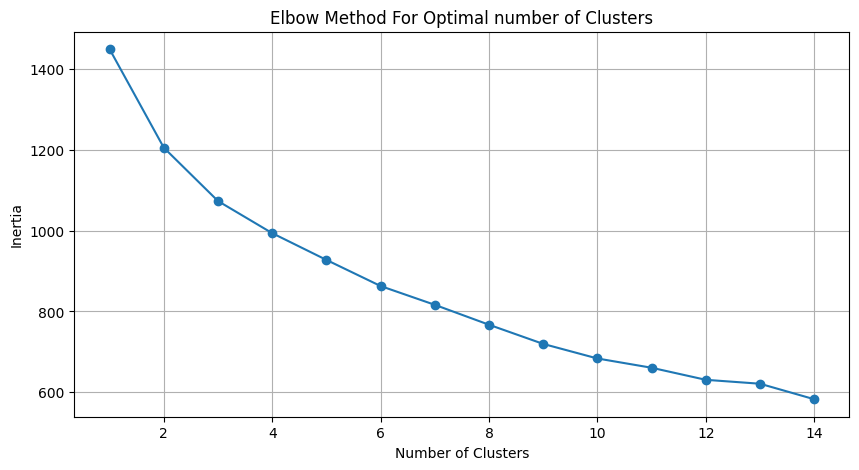

In [ ]:
# optimise_k_means(pck[['us_lpd_t', 'speed_t']], 15)
optimise_k_means(pck[['climb_t', 'us_lpd_t', 'speed_t', 'accex_t', 'accey_t', 'accez_t', 'gyrox_t', 'gyroy_t', 'gyroz_t']], 15)
# #plt.axvline(3, linestyle='--', color='r') = ver no notebok Bike itau

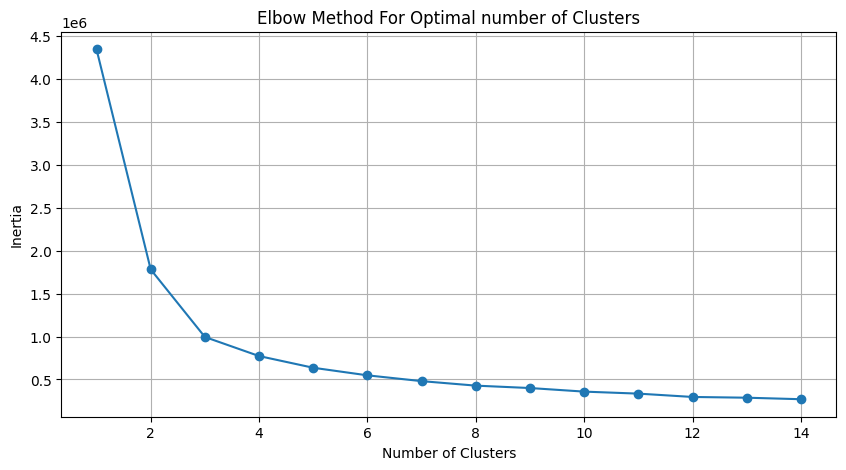

In [ ]:
optimise_k_means(pck[['accex', 'accey', 'accez', 'gyrox', 'gyroy', 'gyroz', 'climb', 'us_lpd', 'speed']], 15)
# optimise_k_means(pck[['climb', 'us_lpd', 'speed']], 15)

In the plot above, we can see that the inertia (sum of the squared distances to the nearest cluster center) decreases as we increase the number of clusters. There is no clear defined break within this dataset, however, we can see that the slope changes from about 4 (3 to 5) clusters onwards.

In [ ]:
# random_state=10 - forma como estava

from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15]
silscore = []
X2 = pck[['climb_t', 'us_lpd_t', 'speed_t', 'accex_t', 'accey_t', 'accez_t', 'gyrox_t', 'gyroy_t', 'gyroz_t']].copy()

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10, init='k-means++', n_init=10)
    cluster_labels = clusterer.fit_predict(X2)
    silhouette_avg = silhouette_score(X2, cluster_labels)
    silscore.append(silhouette_avg)
    print("For n_clusters =", n_clusters,",","The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X2, cluster_labels)

For n_clusters = 2 , The average silhouette_score is : 0.1496322051380347
For n_clusters = 3 , The average silhouette_score is : 0.1373810613722346
For n_clusters = 4 , The average silhouette_score is : 0.1335622825469365
For n_clusters = 5 , The average silhouette_score is : 0.11906506152453945
For n_clusters = 6 , The average silhouette_score is : 0.1017479904810742
For n_clusters = 7 , The average silhouette_score is : 0.12336039022830236
For n_clusters = 8 , The average silhouette_score is : 0.11294442496204284
For n_clusters = 9 , The average silhouette_score is : 0.11252040848623253
For n_clusters = 10 , The average silhouette_score is : 0.13343487289993053
For n_clusters = 15 , The average silhouette_score is : 0.11902445668169791


In [ ]:
# random_state=42 - nova proposta

from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15]
silscore = []
X2 = pck[['climb_t', 'us_lpd_t', 'speed_t', 'accex_t', 'accey_t', 'accez_t', 'gyrox_t', 'gyroy_t', 'gyroz_t']].copy()

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=42, init='k-means++', n_init=10)
    cluster_labels = clusterer.fit_predict(X2)
    silhouette_avg = silhouette_score(X2, cluster_labels)
    silscore.append(silhouette_avg)
    print("For n_clusters =", n_clusters,",","The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X2, cluster_labels)

For n_clusters = 2 , The average silhouette_score is : 0.1496322051380347
For n_clusters = 3 , The average silhouette_score is : 0.13560743095900377
For n_clusters = 4 , The average silhouette_score is : 0.10094280267890506
For n_clusters = 5 , The average silhouette_score is : 0.12763078176686712
For n_clusters = 6 , The average silhouette_score is : 0.12432540987846895
For n_clusters = 7 , The average silhouette_score is : 0.11960709185821396
For n_clusters = 8 , The average silhouette_score is : 0.13109587751942597
For n_clusters = 9 , The average silhouette_score is : 0.12851711254586987
For n_clusters = 10 , The average silhouette_score is : 0.12219200060421012
For n_clusters = 15 , The average silhouette_score is : 0.11758674484153557


Fititting the clustering models

In [ ]:
# kmeans = KMeans(n_clusters=2)
# kmeans.fit(pck[['accex_t', 'accey_t', 'accez_T', 'gyrox_t', 'gyroy_t', 'gyroz_t', 'climb_t', 'us_lpd_t', 'speed_t']])
# #X['cluster_label'] = kmeans.fit_predict(X)
# #centers = kmeans.cluster_centers_
# #labels = kmeans.predict(df[['Latitude', 'Longitude', 'Usreading R']])

# kmeans.cluster_centers_

In [ ]:
# centers = kmeans.cluster_centers_
# centers

In [ ]:
for k in range(2,7):
  kmeans=KMeans(n_clusters=k, random_state=42, init='k-means++', n_init=10)
  kmeans.fit(pck[['climb_t', 'us_lpd_t', 'speed_t', 'accex_t', 'accey_t', 'accez_t', 'gyrox_t', 'gyroy_t', 'gyroz_t']])
  pck[f'KMeans_{k}'] = kmeans.labels_

In [ ]:
pck.head()

latitude  longitude     accex     accey      accez  climb      gyrox  \
0 -15.804338 -47.910262  2.810793  0.689530   2.487576  0.195  49.954198   
1 -15.797828 -47.911870 -0.062249  6.449979  19.612701  0.190  55.763359   
2 -15.808282 -47.926879  0.423774  8.176199  -5.906495  0.147  -8.717557   
3 -15.791270 -47.909070  5.164293  8.135497  -5.066131  0.138  19.106870   
4 -15.799999 -47.914681  3.617639  8.690952  -2.391807  0.138  -0.664122   

       gyroy      gyroz  us_lpd  ...   accey_t   accez_t   gyrox_t   gyroy_t  \
0   0.290076 -14.366412  189.04  ... -1.409379  1.247691  0.988174  0.091380   
1   7.351145 -10.389313  160.03  ... -0.294556  4.819251  1.112933  0.492394   
2  -1.816794 -10.396947   65.30  ...  0.039520 -0.502948 -0.271872 -0.028274   
3  13.541985   0.824427  140.94  ...  0.031643 -0.327685  0.325691  0.843985   
4  -5.297710   7.038168  223.68  ...  0.139141  0.230063 -0.098915 -0.225963   

    gyroz_t  KMeans_2  KMeans_3  KMeans_4  KMeans_5  KMeans_6  
0 -0.560152         0         0         2         0         0  
1 -0.372804         0         1         0         0         0  
2 -0.373164         0         1         0         1         1  
3  0.155438         0         1         0         1         1  
4  0.448147         0         1         0         1         1  

[5 rows x 25 columns]

In [ ]:
#X.plot.scatter(x = 'Latitude', y = 'Longitude', c=labels, s=50f, cmap='viridis')
#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [ ]:
#matplotlib
# plt.scatter(y=pc['latitude'], x=pc['longitude'], c=pc['KMeans_4'])
# plt.show()

## K-means Cluster Representation

In [ ]:
#plotly
# pck["KMeans_3"] = pck["KMeans_3"].astype(float) #convert to string
figkmeans = px.scatter(y=pck['latitude'],
                       x=pck['longitude'],
                       size=pck['us_lpd'],
                       color=pck['KMeans_3'],
                       color_continuous_scale=[(0.00, "blue"),
                                               (0.33, "blue"),
                                               (0.33, "red"),
                                               (0.66, "red"),
                                               (0.66, "orange"),
                                               (1.00, "orange")], size_max=25)

figkmeans.update_layout(title={'text':'K-Means Cluster Analysis',
                               'y':0.95,
                               'x':0.5,
                               'xanchor': 'center',
                               'yanchor': 'top'},
                         xaxis_title="Longitude",
                         yaxis_title="Latitude")

# contextily.add_basemap(ax)
# # fignew.set_axis_off()
figkmeans.show()

In [ ]:
pck_k0 = pck[pck['KMeans_3'] == 1].drop(columns=['climb_t', 'us_lpd_t', 'speed_t', 'accex_t', 'accey_t', 'accez_t', 'gyrox_t', 'gyroy_t', 'gyroz_t', 'KMeans_2', 'KMeans_4', 'KMeans_5', 'KMeans_6'])
pck_k1 = pck[pck['KMeans_3'] == 2].drop(columns=['climb_t', 'us_lpd_t', 'speed_t', 'accex_t', 'accey_t', 'accez_t', 'gyrox_t', 'gyroy_t', 'gyroz_t', 'KMeans_2', 'KMeans_4', 'KMeans_5', 'KMeans_6'])
pck_k2 = pck[pck['KMeans_3'] == 0].drop(columns=['climb_t', 'us_lpd_t', 'speed_t', 'accex_t', 'accey_t', 'accez_t', 'gyrox_t', 'gyroy_t', 'gyroz_t', 'KMeans_2', 'KMeans_4', 'KMeans_5', 'KMeans_6'])

In [ ]:
fignew0 = px.scatter(y=pck_k0['latitude'],
                    x=pck_k0['longitude'],
                    size=pck_k0['us_lpd'],
                    color=pck_k0['KMeans_3'],
                    color_continuous_scale=[(0.00, "red"),
                                            (1.00, "red")], size_max=30)

fignew0.update_layout(title={'text':'Cluster Analysis',
                            'y':0.95,
                            'x':0.5,
                            'xanchor': 'center',
                            'yanchor': 'top'},
                    xaxis_title="Longitude",
                    yaxis_title="Latitude")
fignew0.show()

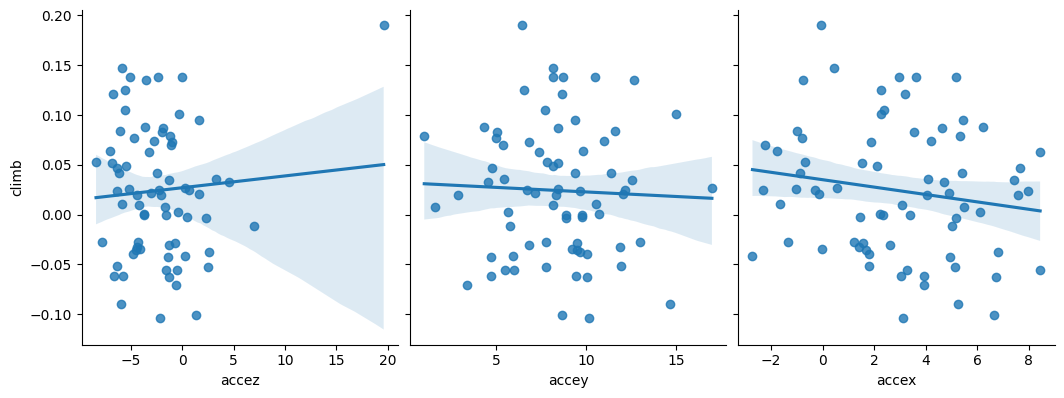

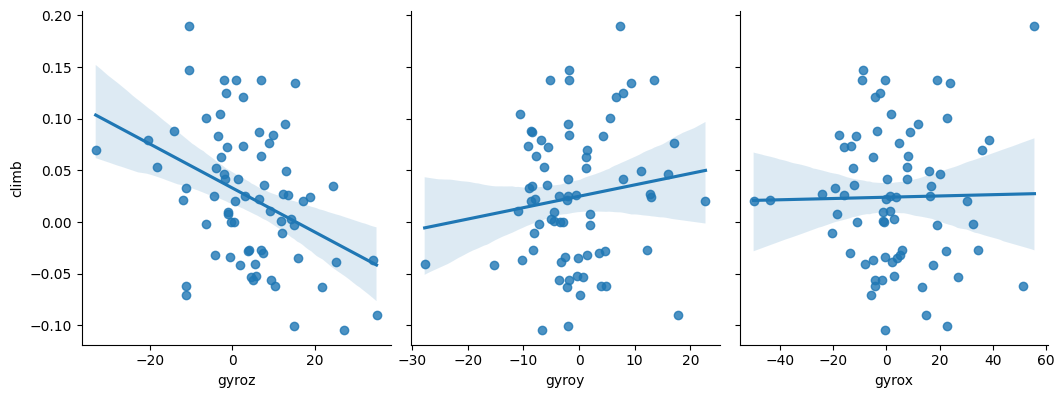

In [ ]:
sns.pairplot(pck_k0, x_vars=["accez",'accey',"accex"], y_vars=["climb"], height=4, aspect=.9, kind="reg");
sns.pairplot(pck_k0, x_vars=["gyroz",'gyroy',"gyrox"], y_vars=["climb"], height=4, aspect=.9, kind="reg");

In [ ]:
fignew1 = px.scatter(y=pck_k1['latitude'],
                    x=pck_k1['longitude'],
                    size=pck_k1['us_lpd'],
                    color=pck_k1['KMeans_3'],
                    color_continuous_scale=[(0.00, "blue"),
                                            (0.33, "blue"),
                                            (0.33, "orange"),
                                            (0.66, "orange"),
                                            (0.66, "red"),
                                            (1.00, "red")], size_max=30)

fignew1.update_layout(title={'text':'Cluster Analysis',
                            'y':0.95,
                            'x':0.5,
                            'xanchor': 'center',
                            'yanchor': 'top'},
                    xaxis_title="Longitude",
                    yaxis_title="Latitude")
fignew1.show()

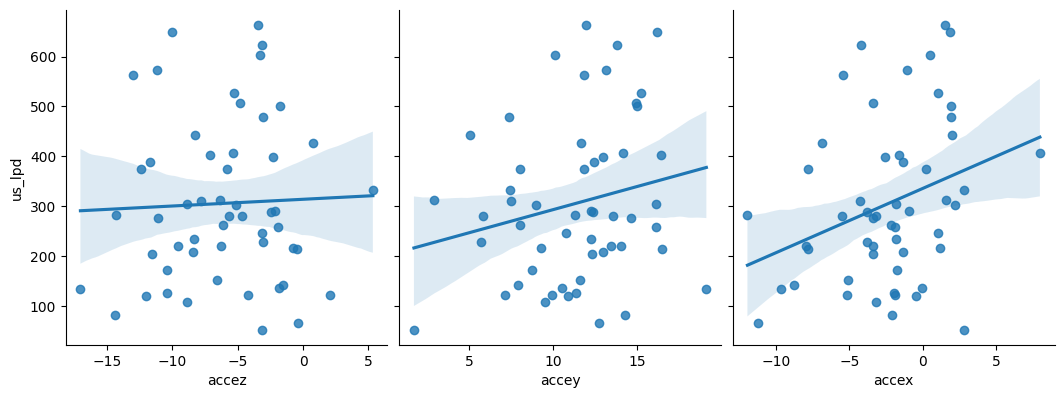

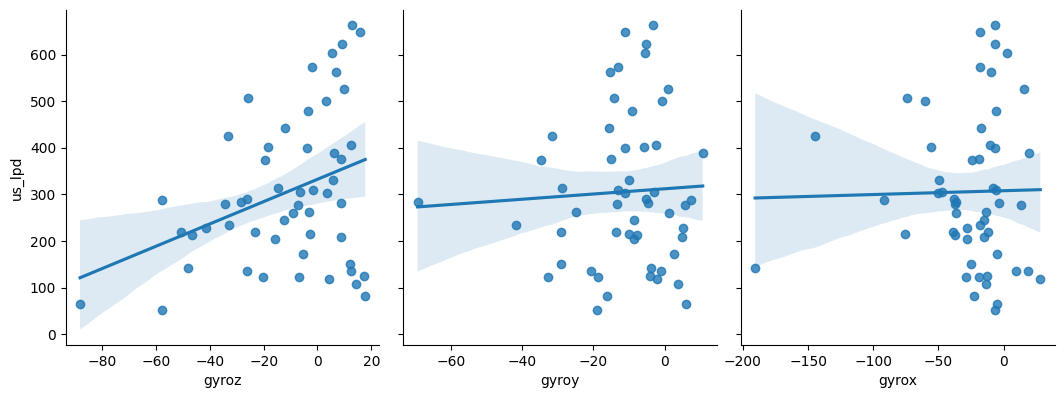

In [ ]:
sns.pairplot(pck_k1, x_vars=["accez",'accey',"accex"], y_vars=["us_lpd"], height=4, aspect=.9, kind="reg");
sns.pairplot(pck_k1, x_vars=["gyroz",'gyroy',"gyrox"], y_vars=["us_lpd"], height=4, aspect=.9, kind="reg");

In [ ]:
fignew2 = px.scatter(y=pck_k2['latitude'],
                    x=pck_k2['longitude'],
                    size=pck_k2['us_lpd'],
                    color=pck_k2['KMeans_3'],
                    color_continuous_scale=[(0.00, "blue"),
                                            (1.00, "blue"),
                                            ], size_max=30)
fignew2.update_layout(title={'text':'Cluster Analysis',
                            'y':0.95,
                            'x':0.5,
                            'xanchor': 'center',
                            'yanchor': 'top'},
                    xaxis_title="Longitude",
                    yaxis_title="Latitude")
fignew2.show()

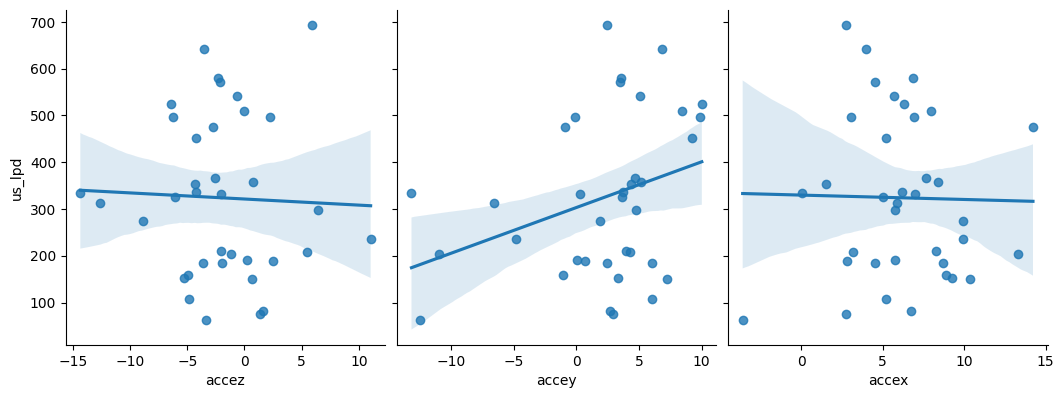

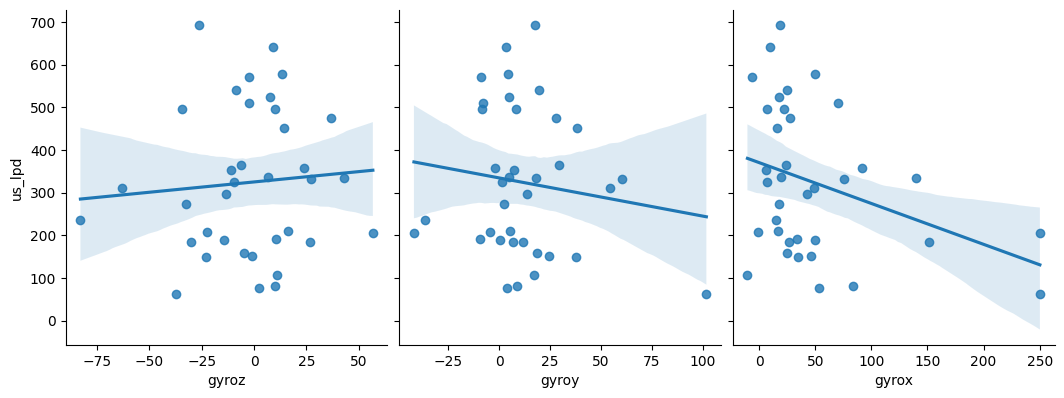

In [ ]:
sns.pairplot(pck_k2, x_vars=["accez",'accey',"accex"], y_vars=["us_lpd"], height=4, aspect=.9, kind="reg");
sns.pairplot(pck_k2, x_vars=["gyroz",'gyroy',"gyrox"], y_vars=["us_lpd"], height=4, aspect=.9, kind="reg");

In [ ]:
pck_k0.describe().round(4)

latitude  longitude    accex    accey    accez    climb    gyrox  \
count   72.0000    72.0000  72.0000  72.0000  72.0000  72.0000  72.0000   
mean   -15.8011   -47.9134   2.9157   8.3974  -2.3212   0.0243   3.6650   
std      0.0073     0.0092   2.8801   3.0325   4.0915   0.0660  18.8169   
min    -15.8142   -47.9269  -2.7270   1.0032  -8.3869  -0.1040 -50.0534   
25%    -15.8057   -47.9236   1.0415   6.3392  -5.2690  -0.0305  -6.3034   
50%    -15.8021   -47.9102   3.0574   8.4432  -2.4050   0.0230   1.3206   
75%    -15.7948   -47.9080   5.1445  10.0682  -0.5926   0.0732  16.1660   
max    -15.7893   -47.8960   8.4491  16.9916  19.6127   0.1900  55.7634   

         gyroy    gyroz    us_lpd    speed  KMeans_3  
count  72.0000  72.0000   72.0000  72.0000      72.0  
mean   -0.6181   4.0567  193.2772   5.7510       1.0  
std     8.4589  12.0283  112.2593   1.9634       0.0  
min   -27.7405 -33.0916    2.5800   0.0000       1.0  
25%    -6.3779  -2.2481   91.0725   4.7798       1.0  
50%    -1.9313   3.8931  177.2250   5.8245       1.0  
75%     4.0324  11.8950  287.6550   7.1090       1.0  
max    22.7328  34.8855  434.2000   8.9070       1.0

In [ ]:
pck_k1.describe().round(4)

latitude  longitude    accex    accey    accez    climb     gyrox  \
count   53.0000    53.0000  53.0000  53.0000  53.0000  53.0000   53.0000   
mean   -15.8018   -47.9113  -2.3197  11.3586  -6.0907  -0.0483  -26.0879   
std      0.0080     0.0099   3.8796   3.6028   4.6270   0.0710   37.4534   
min    -15.8141   -47.9267 -11.9471   1.7358 -17.0300  -0.2450 -190.6412   
25%    -15.8075   -47.9206  -4.2042   8.9926  -9.5624  -0.0880  -37.5802   
50%    -15.8029   -47.9124  -1.8747  11.8681  -5.6671  -0.0520  -17.6870   
75%    -15.7944   -47.9015   0.5171  13.7810  -3.0478  -0.0120   -6.7405   
max    -15.7893   -47.8955   7.9966  19.1177   5.3367   0.1340   28.1756   

         gyroy    gyroz    us_lpd    speed  KMeans_3  
count  53.0000  53.0000   53.0000  53.0000      53.0  
mean  -11.2686 -11.1473  305.7340   7.8726       2.0  
std    14.2901  23.1627  161.3258   1.6440       0.0  
min   -69.2901 -88.2672   52.9600   4.1780       2.0  
25%   -15.7252 -25.7710  203.2900   6.8430       2.0  
50%    -9.3359  -5.2519  281.2800   8.3160       2.0  
75%    -2.4122   6.9847  401.9600   9.1220       2.0  
max    10.6107  17.7405  663.0300  10.6260       2.0

In [ ]:
pck_k2.describe().round(4)

latitude  longitude    accex    accey    accez    climb     gyrox  \
count   36.0000    36.0000  36.0000  36.0000  36.0000  36.0000   36.0000   
mean   -15.7994   -47.9062   6.1404   2.1353  -2.0210  -0.0058   48.7053   
std      0.0062     0.0077   3.4778   5.6654   4.9718   0.0897   61.1907   
min    -15.8126   -47.9250  -3.5889 -13.1585 -14.3580  -0.1990  -10.3969   
25%    -15.8042   -47.9107   4.4047   0.2131  -4.4472  -0.0688   16.2710   
50%    -15.7998   -47.9037   6.0298   3.5386  -2.2410   0.0105   25.9733   
75%    -15.7940   -47.9010   8.2971   5.1236   0.6919   0.0580   50.7004   
max    -15.7893   -47.8962  14.2240  10.0149  11.0325   0.1950  250.1298   

          gyroy    gyroz    us_lpd    speed  KMeans_3  
count   36.0000  36.0000   36.0000  36.0000      36.0  
mean    11.9275  -2.7721  323.9847   8.1672       0.0  
std     25.4215  27.9397  172.0910   1.3484       0.0  
min    -41.9618 -82.9771   63.5400   5.6230       0.0  
25%      1.0973 -16.3454  187.7350   7.5275       0.0  
50%      7.0916  -1.5763  318.5650   8.1880       0.0  
75%     18.6813  11.5057  480.8100   9.1773       0.0  
max    101.7176  56.7710  693.1700  10.2570       0.0

###Cluster distribution comparation

<ipython-input-67-25c7613eea74>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-67-25c7613eea74>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-67-25c7613eea74>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use ei

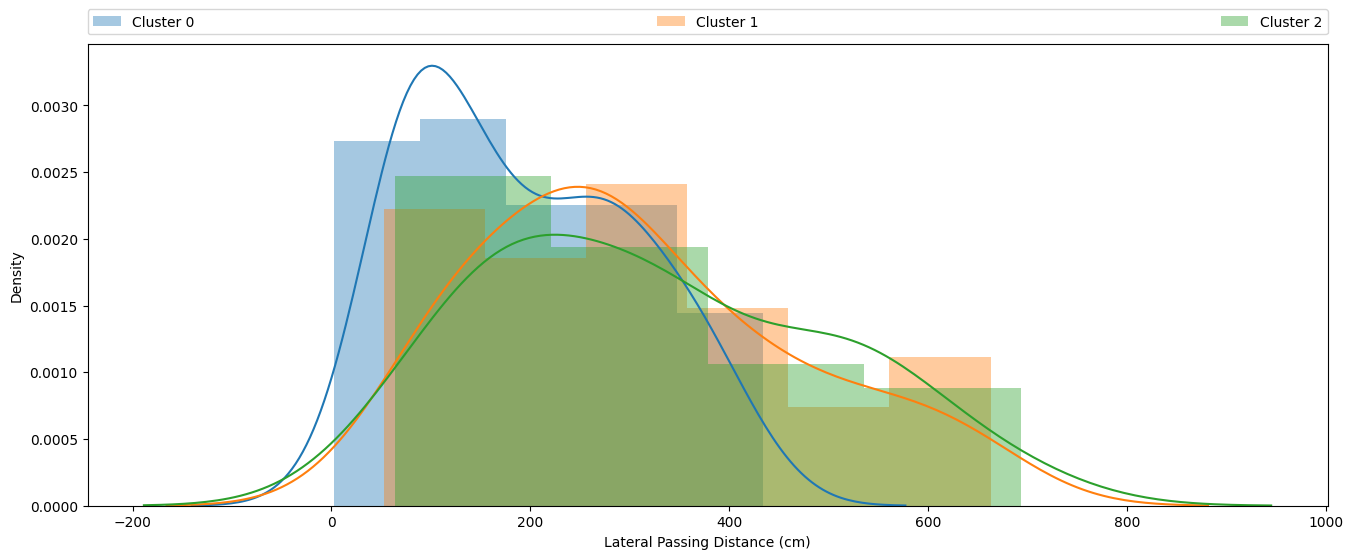

In [ ]:
f, axes = plt.subplots(figsize=(16,6))
sns.set_palette('colorblind')

ax = sns.distplot(pck_k0['us_lpd'],label='Cluster 0')
ax1 = sns.distplot(pck_k1['us_lpd'],label='Cluster 1')
ax2 = sns.distplot(pck_k2['us_lpd'], label='Cluster 2')

ax1.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0.)
ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=4, mode="expand", borderaxespad=0.)

ax1.set_xlabel("Lateral Passing Distance (cm)")
plt.ylabel('Density')

plt.show()

In [ ]:
pd.options.display.float_format = "{:,.2f}".format

# Resumo estatístico da distribuíção da duração das viagens
resumo = pd.DataFrame(data=[pck_k0['us_lpd'].describe(),
                            pck_k1['us_lpd'].describe(),
                            pck_k2['us_lpd'].describe()],
                      index=['Cluster 0','Cluster 1','Cluster 2'])

resumo.columns = ['samples','mean','std','min','25%','50%','75%','max']
resumo

samples   mean    std   min    25%    50%    75%    max
Cluster 0    72.00 193.28 112.26  2.58  91.07 177.23 287.66 434.20
Cluster 1    53.00 305.73 161.33 52.96 203.29 281.28 401.96 663.03
Cluster 2    36.00 323.98 172.09 63.54 187.73 318.56 480.81 693.17

In [ ]:
# Teste KS para comparar as distribuições - Performs the two-sample Kolmogorov-Smirnov test for goodness of fit.
from scipy import stats
print('KS test: {}'.format(stats.ks_2samp(pck_k0['us_lpd'], pck_k1['us_lpd'])))
print('KS test: {}'.format(stats.ks_2samp(pck_k1['us_lpd'], pck_k2['us_lpd'])))
print('KS test: {}'.format(stats.ks_2samp(pck_k0['us_lpd'], pck_k2['us_lpd'])))

KS test: KstestResult(statistic=0.31027253668763105, pvalue=0.004089742487441905, statistic_location=193.69, statistic_sign=1)
KS test: KstestResult(statistic=0.15041928721174005, pvalue=0.6504828182339926, statistic_location=309.78, statistic_sign=1)
KS test: KstestResult(statistic=0.3611111111111111, pvalue=0.00325096238823988, statistic_location=303.85, statistic_sign=1)


In [ ]:
print('Teste KS: {}'.format(stats.ks_2samp(pck_k0['climb'], pck_k1['climb'])))
print('Teste KS: {}'.format(stats.ks_2samp(pck_k1['climb'], pck_k2['climb'])))
print('Teste KS: {}'.format(stats.ks_2samp(pck_k0['climb'], pck_k2['climb'])))

Teste KS: KstestResult(statistic=0.4730083857442348, pvalue=1.000921396539706e-06, statistic_location=-0.01, statistic_sign=-1)
Teste KS: KstestResult(statistic=0.38469601677148846, pvalue=0.002264969000389373, statistic_location=-0.012, statistic_sign=1)
Teste KS: KstestResult(statistic=0.2638888888888889, pvalue=0.06622951404062484, statistic_location=-0.056, statistic_sign=-1)


In [ ]:
# from scipy.stats import f_oneway

# cluster_groups = [pck.loc[pck['KMeans_3']==0, 'us_lpd'].values for arm in pck['KMeans_3'].dropna().unique()]
# stat, p_value = f_oneway(*cluster_groups)
# print(f"F Test: statistic={stat:.4f}, p-value={p_value:.4f}")

In [ ]:
from scipy.stats import f_oneway
k0 = pck_k0[['accex','accey','accez','climb','gyrox','gyroy','gyroz','us_lpd','speed']]
k1 = pck_k1[['accex','accey','accez','climb','gyrox','gyroy','gyroz','us_lpd','speed']]
k2 = pck_k2[['accex','accey','accez','climb','gyrox','gyroy','gyroz','us_lpd','speed']]

ANOVA = f_oneway(k0, k1, k2, axis=0)
ANOVA

F_onewayResult(statistic=array([73.2919095 , 59.53548958, 13.33344521, 14.90184652, 41.35106575,
       23.9135814 ,  8.517297  , 13.91952854, 33.34328441]), pvalue=array([3.02740468e-23, 5.36065366e-20, 4.45836896e-06, 1.17837562e-06,
       3.60574421e-15, 8.45663428e-10, 3.06988733e-04, 2.70450259e-06,
       8.30458635e-13]))


os centros estão vindo escalados - ver possibilidade de listas eles sem a escala normalizada

In [ ]:
centers = kmeans.cluster_centers_
centers

array([[ 0.74745194, -0.32209712,  0.08026352,  0.75205555, -1.21791562,
         0.92622281,  0.50733667,  0.32790092, -1.33597353],
       [ 0.48752739, -0.38085435, -0.82171945, -0.09393643,  0.24298817,
        -0.2207412 , -0.15363676,  0.03505958,  0.18134123],
       [ 0.14692898,  1.57429477,  0.60951655,  0.39141509,  0.10498777,
         0.05405057,  0.18492726,  0.41430467,  0.41335592],
       [-0.73495789,  0.12513748,  0.5919534 , -1.30849729,  0.71618269,
        -0.54702232, -0.86371927, -0.82845133, -0.82816846],
       [-0.54025559, -0.42970478,  0.2819672 ,  0.72165134, -0.2753621 ,
         0.49948785,  0.2917649 ,  0.11120431,  0.60547387],
       [-0.63417082, -0.37962781,  1.34080093,  0.2906871 , -3.90591494,
        -0.584838  ,  4.49988803,  1.55049218,  1.10368435]])

parentesis para ver centros de diferentes clusters

In [ ]:
#   #Para ver os centros do caso pontual de n clusters

# kmeans = KMeans(n_clusters=3)
# kmeans.fit(pck[['accex_t', 'accey_t', 'accez_T', 'gyrox_t', 'gyroy_t', 'gyroz_t', 'climb_t', 'us_lpd_t', 'speed_t']])
# #X['cluster_label'] = kmeans.fit_predict(X)
# #centers = kmeans.cluster_centers_
# #labels = kmeans.predict(df[['Latitude', 'Longitude', 'Usreading R']])

# kmeans.cluster_centers_

In [ ]:
# kmeans.fit(pck[['accex_t', 'accey_t', 'accez_t', 'gyrox_t', 'gyroy_t', 'gyroz_t', 'climb_t', 'us_lpd_t', 'speed_t']])

In [ ]:
# from sklear.preprocessing import OrdinalEncoder

# oe = OrdinalEncoder()
# X = or.fit_transform(X)

In [ ]:
kmeans.cluster_centers_

array([[ 0.74745194, -0.32209712,  0.08026352,  0.75205555, -1.21791562,
         0.92622281,  0.50733667,  0.32790092, -1.33597353],
       [ 0.48752739, -0.38085435, -0.82171945, -0.09393643,  0.24298817,
        -0.2207412 , -0.15363676,  0.03505958,  0.18134123],
       [ 0.14692898,  1.57429477,  0.60951655,  0.39141509,  0.10498777,
         0.05405057,  0.18492726,  0.41430467,  0.41335592],
       [-0.73495789,  0.12513748,  0.5919534 , -1.30849729,  0.71618269,
        -0.54702232, -0.86371927, -0.82845133, -0.82816846],
       [-0.54025559, -0.42970478,  0.2819672 ,  0.72165134, -0.2753621 ,
         0.49948785,  0.2917649 ,  0.11120431,  0.60547387],
       [-0.63417082, -0.37962781,  1.34080093,  0.2906871 , -3.90591494,
        -0.584838  ,  4.49988803,  1.55049218,  1.10368435]])

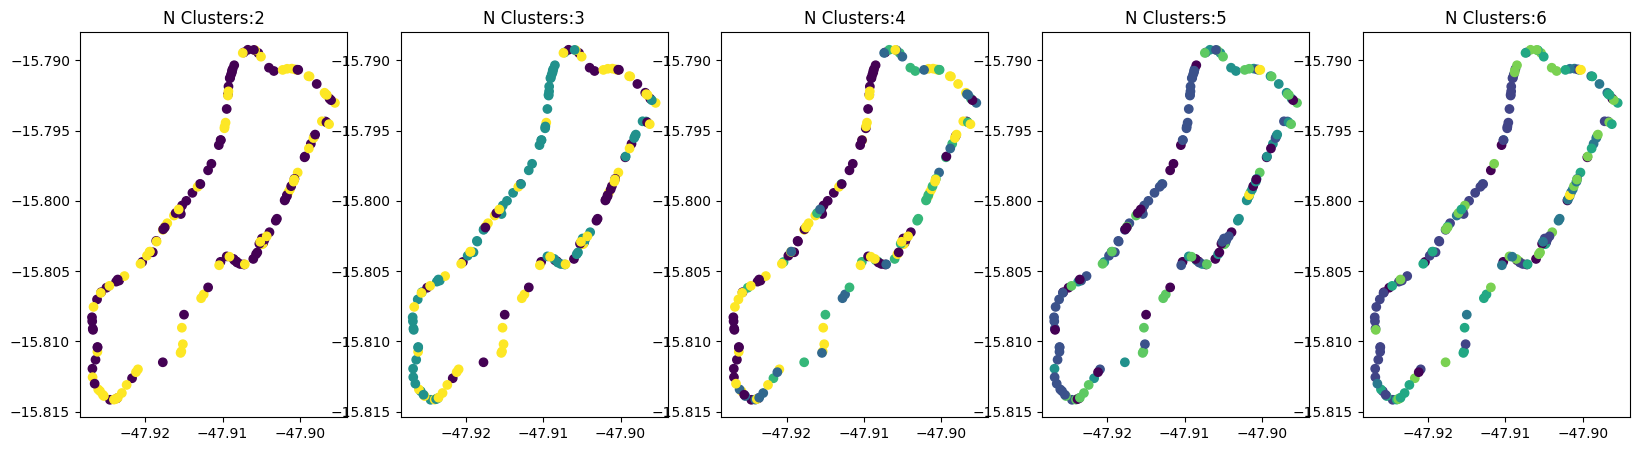

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20,5))
#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
for i, ax in enumerate(fig.axes, start=2):
    ax.scatter(y=pck['latitude'], x=pck['longitude'], c=pck[f'KMeans_{i}'])
    ax.set_title(f'N Clusters:{i}')

silhouette score for k-means

In [ ]:
pck['KMeans_3'].describe()

count   161.00
mean      1.11
std       0.74
min       0.00
25%       1.00
50%       1.00
75%       2.00
max       2.00
Name: KMeans_3, dtype: float64

In [ ]:
pck[['us_lpd','speed', 'climb']].describe()

us_lpd  speed  climb
count  161.00 161.00 161.00
mean   259.52   6.99  -0.01
std    155.39   2.06   0.08
min      2.58   0.00  -0.24
25%    136.36   5.55  -0.06
50%    235.97   7.32  -0.01
75%    350.22   8.61   0.05
max    693.17  10.63   0.20

###Feature Silhouette Analysis

In [ ]:
from sklearn import metrics

  #total
X2 = pck[['climb_t', 'us_lpd_t', 'speed_t', 'accex_t', 'accey_t', 'accez_t', 'gyrox_t', 'gyroy_t', 'gyroz_t']]
kmeans_model = KMeans(n_clusters=3, random_state=42, init='k-means++', n_init=10).fit(X2)
labels = kmeans_model.labels_
metrics.silhouette_score(X2, labels, metric='euclidean')

0.13560743095900377

In [ ]:
  #3 + acce

X3 = pck[['climb_t', 'us_lpd_t', 'speed_t', 'accex_t', 'accey_t', 'accez_t']]
kmeans_model = KMeans(n_clusters=3, random_state=42, init='k-means++', n_init=10).fit(X3)
labels = kmeans_model.labels_
metrics.silhouette_score(X3, labels, metric='euclidean')

0.1615005340590855

In [ ]:
  #3 + gyro

X7 = pck[['climb_t', 'us_lpd_t', 'speed_t', 'gyrox_t', 'gyroy_t', 'gyroz_t']]
kmeans_model = KMeans(n_clusters=3, random_state=42, init='k-means++', n_init=10).fit(X7)
labels = kmeans_model.labels_
metrics.silhouette_score(X7, labels, metric='euclidean')

0.19070782205619874

In [ ]:
  #3 = n_clusters ruim

X4 = pck[['climb_t', 'us_lpd_t', 'speed_t']]
kmeans_model = KMeans(n_clusters=3, random_state=42, init='k-means++', n_init=10).fit(X4)
labels = kmeans_model.labels_
metrics.silhouette_score(X4, labels, metric='euclidean')

0.25815048892680814

In [ ]:
X5 = pck[['climb_t', 'us_lpd_t']]
kmeans_model = KMeans(n_clusters=3, random_state=42, init='k-means++', n_init=10).fit(X5)
labels = kmeans_model.labels_
metrics.silhouette_score(X5, labels, metric='euclidean')

0.35244390791974306

In [ ]:
X6 = pck[['speed_t', 'us_lpd_t']]
kmeans_model = KMeans(n_clusters=3, random_state=42, init='k-means++', n_init=10).fit(X6)
labels = kmeans_model.labels_
metrics.silhouette_score(X6, labels, metric='euclidean')

0.3870782334632896

### PCA test

In [ ]:
 import numpy as np
from sklearn.decomposition import PCA

X = np.array(pck[['climb_t', 'speed_t', 'accex_t', 'accey_t', 'accez_t', 'gyrox_t', 'gyroy_t', 'gyroz_t', 'us_lpd_t']])
pca = PCA(n_components=2)
x = pca.fit_transform(X)

print(pca.explained_variance_ratio_)

[0.28161063 0.15312642]


In [ ]:
Xt = np.array(pck[['climb', 'speed', 'accex', 'accey', 'accez', 'gyrox', 'gyroy', 'gyroz','us_lpd']])
pca = PCA(n_components=2)
xt = pca.fit_transform(Xt)

print(pca.explained_variance_ratio_)

[0.88922816 0.0844997 ]


In [ ]:
cols = pck[['climb_t', 'us_lpd_t', 'speed_t', 'accex_t', 'accey_t', 'accez_t', 'gyrox_t', 'gyroy_t', 'gyroz_t', 'us_lpd_t']].columns.tolist()


In [ ]:
dt = pd.DataFrame(xt)
dt['us_lpd'] = pck['us_lpd_t']

d = pd.DataFrame(xt)
d['us_lpd'] = pck['us_lpd']

<Axes: >

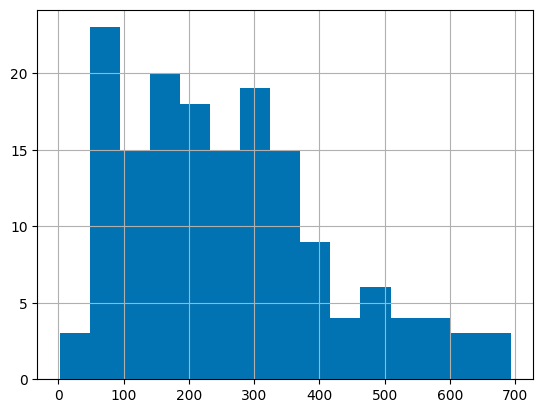

In [ ]:
pck['us_lpd'].hist(bins=15)

In [ ]:
px.scatter(dt, x=1,y=0, color='us_lpd')

In [ ]:
px.scatter(d, x=1,y=0, color='us_lpd',
           color_continuous_scale=[(0.00, "red"),
                                   (0.33, "red"),
                                   (0.33, "orange"),
                                   (0.66, "orange"),
                                   (0.66, "blue"),
                                   (1.00, "blue")])

In [ ]:
c1 = pck[pck['KMeans_3']==0]

####Fim K-means

#*DBSCAN* - Greg

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/MSc/park_analysis4_total.xlsx")

In [ ]:
pcD = df.copy()

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
pcD.rename(columns = {' us_lpd_left':'us_lpd'}, inplace = True)

In [ ]:
# DBSCAN is not sensitive to scalar variation like k-means
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# pcD[['climb_t', 'us_lpd_left_t', 'speed_t']] = scaler.fit_transform(pcD[[ 'climb', ' us_lpd_left', 'speed']])
# pcD

In [ ]:
pcD.head()

latitude  longitude  accex  accey  accez  climb  gyrox  gyroy  gyroz  \
0    -15.80     -47.91   2.81   0.69   2.49   0.20  49.95   0.29 -14.37   
1    -15.80     -47.91  -0.06   6.45  19.61   0.19  55.76   7.35 -10.39   
2    -15.81     -47.93   0.42   8.18  -5.91   0.15  -8.72  -1.82 -10.40   
3    -15.79     -47.91   5.16   8.14  -5.07   0.14  19.11  13.54   0.82   
4    -15.80     -47.91   3.62   8.69  -2.39   0.14  -0.66  -5.30   7.04   

   us_lpd  speed  
0  189.04   9.06  
1  160.03   6.72  
2   65.30   3.85  
3  140.94   4.42  
4  223.68   6.65

In [ ]:
lat_long_read = pcD[['latitude','longitude','climb','speed','us_lpd']]
lat, longg, climb, speed, lpd = pcD.latitude, pcD.longitude, pcD.climb, pcD.speed, pcD.us_lpd

# plt.scatter(climb,lpd,speed)

In [ ]:
X = pcD[['latitude', 'longitude','climb','speed', 'us_lpd']]

from sklearn.cluster import DBSCAN
X = lat_long_read.to_numpy()

dbscan_cluster_model = DBSCAN(eps=0.00025, min_samples=2).fit(X)
dbscan_cluster_model

DBSCAN(eps=0.00025, min_samples=2)

In [ ]:
pcD['cluster'] = dbscan_cluster_model.labels_
pcD.head()

latitude  longitude  accex  accey  accez  climb  gyrox  gyroy  gyroz  \
0    -15.80     -47.91   2.81   0.69   2.49   0.20  49.95   0.29 -14.37   
1    -15.80     -47.91  -0.06   6.45  19.61   0.19  55.76   7.35 -10.39   
2    -15.81     -47.93   0.42   8.18  -5.91   0.15  -8.72  -1.82 -10.40   
3    -15.79     -47.91   5.16   8.14  -5.07   0.14  19.11  13.54   0.82   
4    -15.80     -47.91   3.62   8.69  -2.39   0.14  -0.66  -5.30   7.04   

   us_lpd  speed  cluster  
0  189.04   9.06       -1  
1  160.03   6.72       -1  
2   65.30   3.85       -1  
3  140.94   4.42       -1  
4  223.68   6.65       -1

In [ ]:
pcD['cluster'].value_counts()

-1    161
Name: cluster, dtype: int64

https://colab.research.google.com/drive/1DphvjpgQXwBWQq08dMyoSc6UREzXLxSE?usp=sharing#scrollTo=aWZJXk5aXcZX
testar encontrar melhor esp e min_sample

In [ ]:
# px.scatter_3d(data_frame=pcD,x=longg, y=lat, z=lpd, color=pcD['cluster'],template='plotly_white',
#              title='3D Scatter plot for KMeans Clusters')

In [ ]:
# from sklearn.metrics import silhouette_score as ss
# ss(X, pcD['cluster'])

In [ ]:
epsilons = np.linspace(0.01, 1, num=15)
epsilons

array([0.01      , 0.08071429, 0.15142857, 0.22214286, 0.29285714,
       0.36357143, 0.43428571, 0.505     , 0.57571429, 0.64642857,
       0.71714286, 0.78785714, 0.85857143, 0.92928571, 1.        ])

In [ ]:
min_samples = np.arange(2, 20, step=3)
min_samples

array([ 2,  5,  8, 11, 14, 17])

In [ ]:
import itertools
combinations = list(itertools.product(epsilons, min_samples))
combinations

[(0.01, 2),
 (0.01, 5),
 (0.01, 8),
 (0.01, 11),
 (0.01, 14),
 (0.01, 17),
 (0.08071428571428571, 2),
 (0.08071428571428571, 5),
 (0.08071428571428571, 8),
 (0.08071428571428571, 11),
 (0.08071428571428571, 14),
 (0.08071428571428571, 17),
 (0.15142857142857144, 2),
 (0.15142857142857144, 5),
 (0.15142857142857144, 8),
 (0.15142857142857144, 11),
 (0.15142857142857144, 14),
 (0.15142857142857144, 17),
 (0.22214285714285714, 2),
 (0.22214285714285714, 5),
 (0.22214285714285714, 8),
 (0.22214285714285714, 11),
 (0.22214285714285714, 14),
 (0.22214285714285714, 17),
 (0.29285714285714287, 2),
 (0.29285714285714287, 5),
 (0.29285714285714287, 8),
 (0.29285714285714287, 11),
 (0.29285714285714287, 14),
 (0.29285714285714287, 17),
 (0.3635714285714286, 2),
 (0.3635714285714286, 5),
 (0.3635714285714286, 8),
 (0.3635714285714286, 11),
 (0.3635714285714286, 14),
 (0.3635714285714286, 17),
 (0.4342857142857143, 2),
 (0.4342857142857143, 5),
 (0.4342857142857143, 8),
 (0.4342857142857143, 11),
 

In [ ]:
combinations = list(itertools.product(epsilons, min_samples))
N = len(combinations)
N

90

In [ ]:
def get_scores_and_labels(combinations, X):
  scores = []
  all_labels_list = []

  for i, (eps, num_samples) in enumerate(combinations):
    dbscan_cluster_model = DBSCAN(eps=eps, min_samples=num_samples).fit(X)
    labels = dbscan_cluster_model.labels_
    labels_set = set(labels)
    num_clusters = len(labels_set)
    if -1 in labels_set:
      num_clusters -= 1

    if (num_clusters < 2) or (num_clusters > 50):
      scores.append(-10)
      all_labels_list.append('bad')
      c = (eps, num_samples)
      print(f"Combination {c} on iteration {i+1} of {N} has {num_clusters} clusters. Moving on")
      continue

    scores.append(ss(X, labels))
    all_labels_list.append(labels)
    print(f"Index: {i}, Score: {scores[-1]}, Labels: {all_labels_list[-1]}, NumClusters: {num_clusters}")

  best_index = np.argmax(scores)
  best_parameters = combinations[best_index]
  best_labels = all_labels_list[best_index]
  best_score = scores[best_index]

  return {'best_epsilon': best_parameters[0],
          'best_min_samples': best_parameters[1],
          'best_labels': best_labels,
          'best_score': best_score}

best_dict = get_scores_and_labels(combinations, X)

Combination (0.01, 2) on iteration 1 of 90 has 0 clusters. Moving on
Combination (0.01, 5) on iteration 2 of 90 has 0 clusters. Moving on
Combination (0.01, 8) on iteration 3 of 90 has 0 clusters. Moving on
Combination (0.01, 11) on iteration 4 of 90 has 0 clusters. Moving on
Combination (0.01, 14) on iteration 5 of 90 has 0 clusters. Moving on
Combination (0.01, 17) on iteration 6 of 90 has 0 clusters. Moving on
Combination (0.08071428571428571, 2) on iteration 7 of 90 has 0 clusters. Moving on
Combination (0.08071428571428571, 5) on iteration 8 of 90 has 0 clusters. Moving on
Combination (0.08071428571428571, 8) on iteration 9 of 90 has 0 clusters. Moving on
Combination (0.08071428571428571, 11) on iteration 10 of 90 has 0 clusters. Moving on
Combination (0.08071428571428571, 14) on iteration 11 of 90 has 0 clusters. Moving on
Combination (0.08071428571428571, 17) on iteration 12 of 90 has 0 clusters. Moving on
Combination (0.15142857142857144, 2) on iteration 13 of 90 has 0 clusters

Epsilon, MinSamples and Silhouette Score for DBSCAN

In [ ]:
best_dict

{'best_epsilon': 0.4342857142857143,
 'best_min_samples': 2,
 'best_labels': array([-1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        -1, -1,  1, -1, -1, -1, -1, -1]),
 'best_score': -0.48985380260702777}

Clusters and Noise Points

In [ ]:
pcD['cluster'] = best_dict['best_labels']
pcD['cluster'].value_counts()

-1    156
 0      3
 1      2
Name: cluster, dtype: int64

In [ ]:
len(set('cluster'))

7

## DBSCAN Representation

In [ ]:
figdbscan = px.scatter(x=longg, y=lat, color=pcD['cluster'],
                 color_continuous_scale=[(0.00, "red"),
                                         (0.33, "red"),
                                         (0.33, "orange"),
                                         (0.66, "orange"),
                                         (0.66, "blue"),
                                         (1.00, "blue")], size_max=25)

figdbscan.update_layout(title={'text':'DBSCAN Cluster Analysis',
                            'y':0.95,
                            'x':0.5,
                            'xanchor': 'center',
                            'yanchor': 'top'},
                     xaxis_title="Longitude",
                     yaxis_title="Latitude")

figdbscan.show()

Silhouette Score for DBSCAN

In [ ]:
ss(X, pcD['cluster'])

-0.48985380260702777

In [ ]:
# px.scatter_3d(data_frame=pcD,x=longg, y=lat, z=lpd, color=pcD['cluster'],template='plotly_white',
#              title='3D Scatter plot for KMeans Clusters')

#### Fim DBSCAN

# Correlation Analysis

In [ ]:
from collections import defaultdict

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

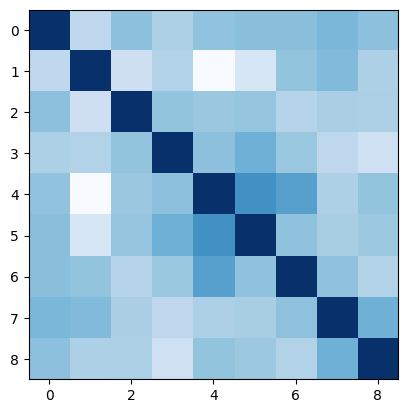

In [ ]:
  #gráfico de correlação mais simples

corr = study.corr()
plt.imshow(corr, cmap='Blues')
plt.show()

Identificação de variáveis que tiverem correlação maior que p

In [ ]:
p = 0.40 # correlação mínima
var = []
for i in corr.columns:
    for j in corr.columns:
        if(i != j):
            if np.abs(corr[i][j]) > p: # se maior do que |p|
                var.append([i,j])
print('Variáveis mais correlacionadas:\n', var)

Variáveis mais correlacionadas:
 [['accey', 'gyrox'], ['gyrox', 'accey'], ['gyrox', 'gyroy'], ['gyroy', 'gyrox']]


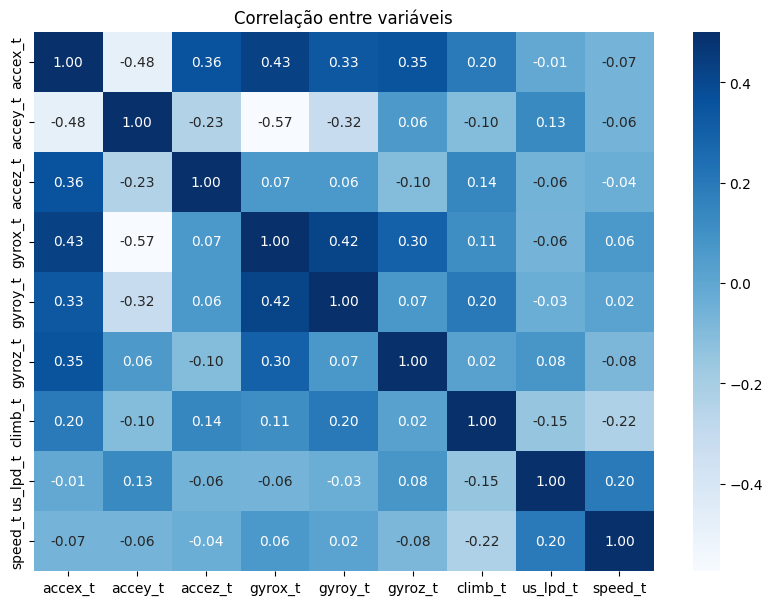

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(pck[['accex_t', 'accey_t', 'accez_t',
                 'gyrox_t', 'gyroy_t', 'gyroz_t',
                 'climb_t', 'us_lpd_t', 'speed_t']].corr(),
            annot = True,
            vmax=.5,
            fmt = '.2f',
            cmap='Blues')
plt.title('Correlação entre variáveis')
plt.show()

<Axes: >

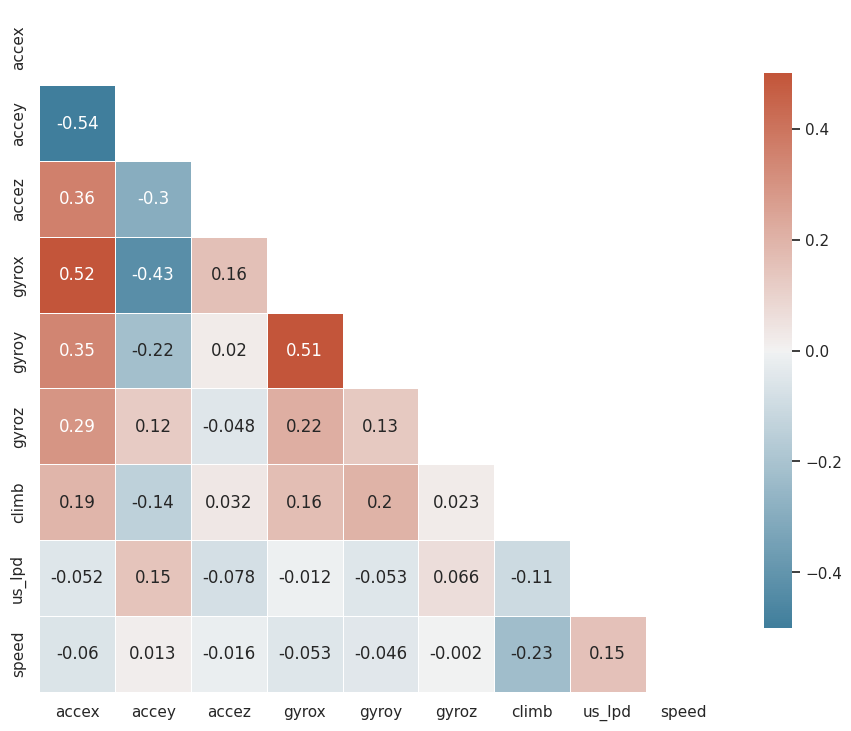

In [ ]:
from string import ascii_letters
sns.set_theme(style="white")

# Compute the correlation matrix
corr = pck[['accex', 'accey', 'accez',
            'gyrox', 'gyroy', 'gyroz',
            'climb', 'us_lpd', 'speed']].corr(method = 'spearman')

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, annot = True, vmax=.5, vmin=-.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .8})

<Axes: >

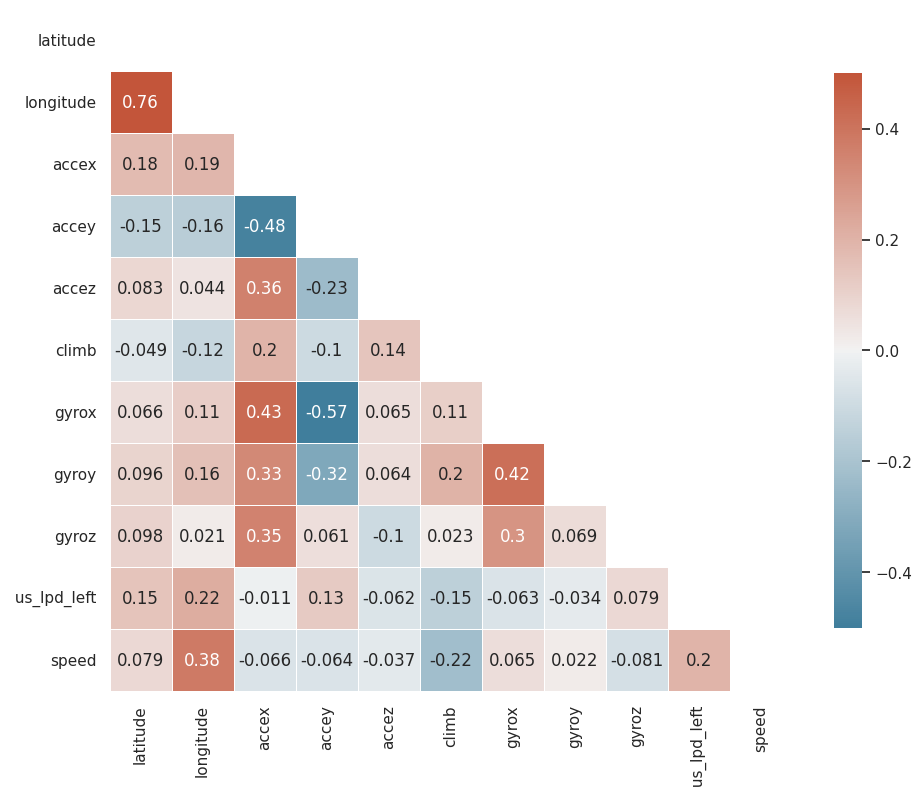

In [ ]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, annot = True, vmax=.5, vmin=-.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .8})

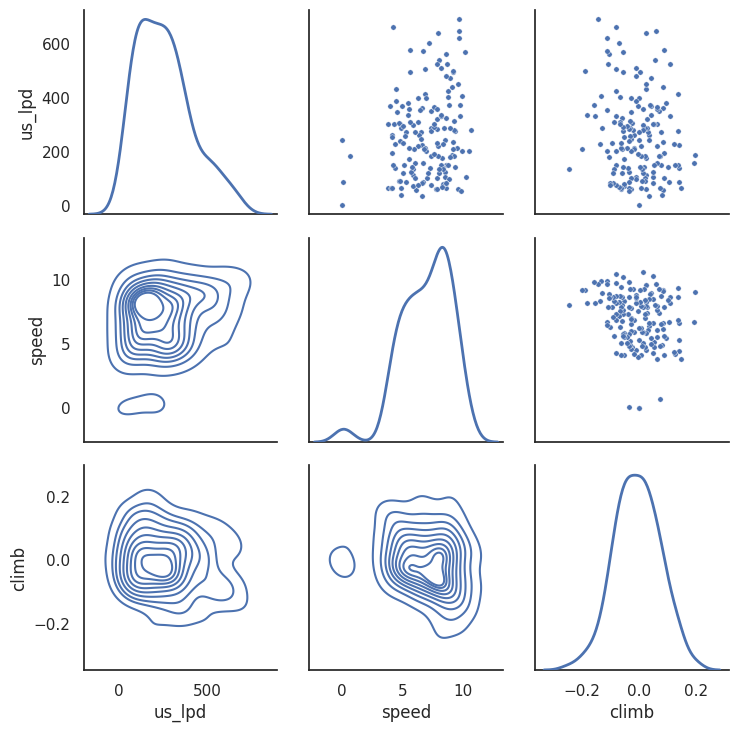

In [ ]:
sns.set_theme(style="white")
g = sns.PairGrid(pck[['us_lpd', 'speed', 'climb']], diag_sharey=False)
g.map_upper(sns.scatterplot, s=15)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=2)

#Traffic Volume Analysis

In [ ]:
volume = pd.read_excel('/content/drive/MyDrive/MSc/pdc_volume.xlsx')

In [ ]:
volume.head()

trecho  latitude  longitude  accey  climb   us_lpd  speed  volume
0       3    -15.81     -47.93   8.18   0.15    65.30   3.85     330
1       3    -15.81     -47.93  10.47   0.14    86.18   5.32     330
2       3    -15.81     -47.93   6.55   0.12   152.27   4.22     330
3       3    -15.81     -47.92  14.97   0.10   145.13   8.38     330
4       3    -15.81     -47.93   9.38   0.10   382.20   5.43     330

In [ ]:
volume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   trecho     115 non-null    int64  
 1   latitude   115 non-null    float64
 2   longitude  115 non-null    float64
 3   accey      115 non-null    float64
 4   climb      115 non-null    float64
 5    us_lpd    115 non-null    float64
 6   speed      115 non-null    float64
 7   volume     115 non-null    int64  
dtypes: float64(6), int64(2)
memory usage: 7.3 KB


In [ ]:
volume_t = volume.copy()
volume_t.head()

trecho  latitude  longitude  accey  climb   us_lpd  speed  volume
0       3    -15.81     -47.93   8.18   0.15    65.30   3.85     330
1       3    -15.81     -47.93  10.47   0.14    86.18   5.32     330
2       3    -15.81     -47.93   6.55   0.12   152.27   4.22     330
3       3    -15.81     -47.92  14.97   0.10   145.13   8.38     330
4       3    -15.81     -47.93   9.38   0.10   382.20   5.43     330

In [ ]:
volume_t.describe()

trecho  latitude  longitude  accey  climb   us_lpd  speed  volume
count  115.00    115.00     115.00 115.00 115.00   115.00 115.00  115.00
mean     1.67    -15.80     -47.91   8.24   0.01   242.60   6.47  147.50
std      0.77      0.01       0.01   4.48   0.08   142.48   1.85   86.75
min      1.00    -15.81     -47.93 -12.51  -0.24    35.63   0.12  103.00
25%      1.00    -15.81     -47.92   5.67  -0.04   129.39   5.05  103.00
50%      1.00    -15.80     -47.91   8.43   0.01   227.48   6.55  103.00
75%      2.00    -15.80     -47.90  10.76   0.06   325.77   7.86  113.00
max      3.00    -15.79     -47.90  19.12   0.19   648.89  10.63  330.00

In [ ]:
scaler = StandardScaler()
volume_t[['accey_t', 'climb_t','us_lpd_t','speed_t', 'volume_t']] = scaler.fit_transform(volume_t[['accey',	'climb',' us_lpd', 'speed',	'volume']])
volume_t.head()

trecho  latitude  longitude  accey  climb   us_lpd  speed  volume  accey_t  \
0       3    -15.81     -47.93   8.18   0.15    65.30   3.85     330    -0.01   
1       3    -15.81     -47.93  10.47   0.14    86.18   5.32     330     0.50   
2       3    -15.81     -47.93   6.55   0.12   152.27   4.22     330    -0.38   
3       3    -15.81     -47.92  14.97   0.10   145.13   8.38     330     1.51   
4       3    -15.81     -47.93   9.38   0.10   382.20   5.43     330     0.26   

   climb_t  us_lpd_t  speed_t  volume_t  
0     1.79     -1.25    -1.42      2.11  
1     1.67     -1.10    -0.62      2.11  
2     1.50     -0.64    -1.22      2.11  
3     1.19     -0.69     1.04      2.11  
4     1.11      0.98    -0.56      2.11

Elbow Method for Optimal number of Clusters

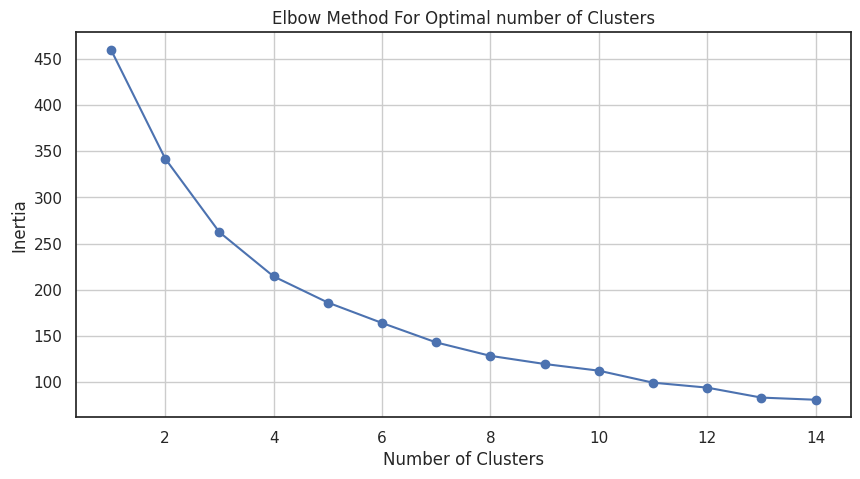

In [ ]:
optimise_k_means(volume_t[['climb_t', 'us_lpd_t', 'speed_t', 'volume_t']], 15)

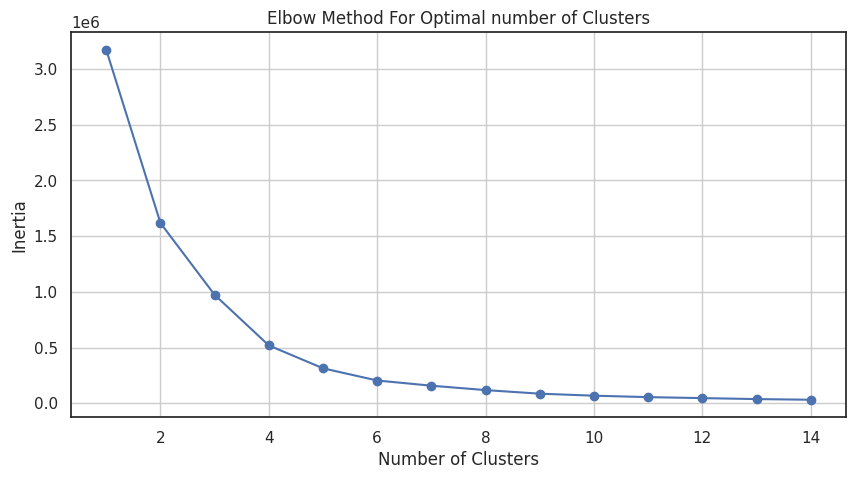

In [ ]:
optimise_k_means(volume[['climb', ' us_lpd', 'speed', 'volume']], 15)

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 17]
silscore = []
X2 = volume_t[[ 'us_lpd_t', 'volume_t']].copy()

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X2)
    silhouette_avg = silhouette_score(X2, cluster_labels)
    silscore.append(silhouette_avg)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X2, cluster_labels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 2 The average silhouette_score is : 0.6155615039769924
For n_clusters = 3 The average silhouette_score is : 0.5693937339101394
For n_clusters = 4 The average silhouette_score is : 0.6104053704666942
For n_clusters = 5 The average silhouette_score is : 0.6096743733132539
For n_clusters = 6 The average silhouette_score is : 0.5749805264692972
For n_clusters = 7 The average silhouette_score is : 0.5590378949805368


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



For n_clusters = 8 The average silhouette_score is : 0.5578535557605693
For n_clusters = 9 The average silhouette_score is : 0.5493884707907682
For n_clusters = 10 The average silhouette_score is : 0.5495740757487663
For n_clusters = 15 The average silhouette_score is : 0.5140893699273119
For n_clusters = 17 The average silhouette_score is : 0.49770680766220304


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Correlation between features

<Axes: >

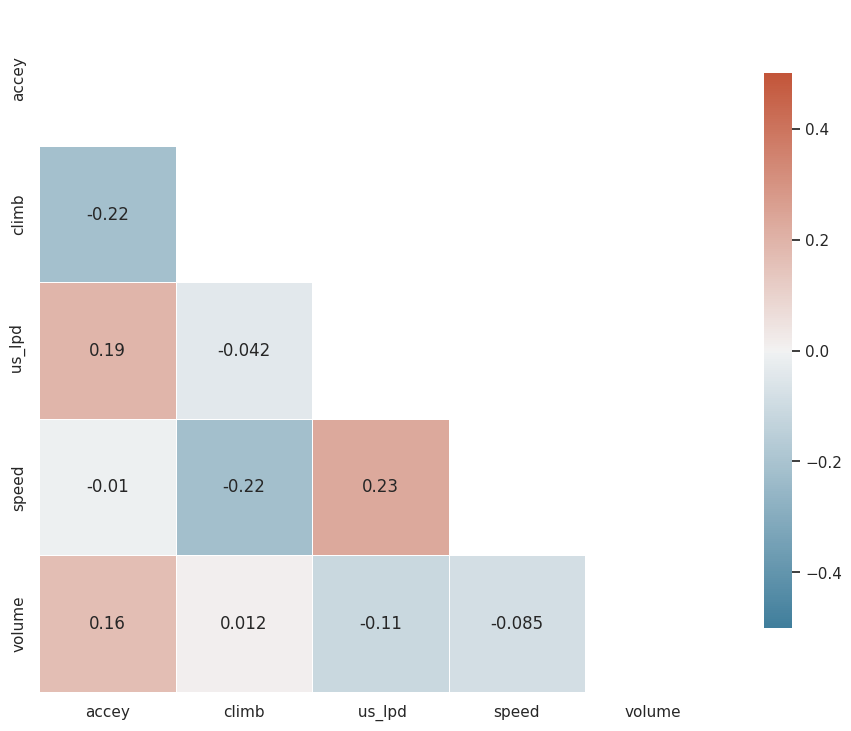

In [ ]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = volume[['accey','climb', ' us_lpd', 'speed', 'volume']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, annot = True, vmax=.5, vmin=-.5, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .8})

In [ ]:
for k in range(2,7):
  kmeans=KMeans(n_clusters=k)
  kmeans.fit(volume_t[['climb_t', 'us_lpd_t', 'speed_t', 'volume_t']])
  volume_t[f'KMeans_{k}'] = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

Clustering Visualization

In [ ]:
import plotly.express as px
fignew = px.scatter(y=volume_t['latitude'], x=volume_t['longitude'], size=volume_t[' us_lpd'], color=volume_t['KMeans_3'], size_max=25)
fignew.show()

###html converter

In [ ]:
#!pip install nbconvert
#%%shell
!jupyter nbconvert --to html /content/drive/MyDrive/MSc/MSc_Analysis.ipynb
print('Notebook salved in .html file')

[NbConvertApp] Converting notebook /content/drive/MyDrive/MSc/MSc_Analysis.ipynb to html
[NbConvertApp] Writing 2886605 bytes to /content/drive/MyDrive/MSc/MSc_Analysis.html
Notebook salved in .html file
